# Ad Hoc Analyses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import gamma
from scipy.stats import beta
import warnings
warnings.filterwarnings("ignore", message = 'DataFrame is highly fragmented.  This is usually the result of')

In [2]:
%run -i MABs_Classes_Functions
%run -i MABs_Exp_Generations
%run -i MABs_Comparisons
%run -i MABs_KL_Functions
%run -i MABs_Env_Generations

In [347]:
def pois_exp_choices_regrets(n_rounds, n_iterations, beta_1, beta_v, soft_temp, soft_eps_temp, l_rate, max_iter, lambdas, title, dist, beta_moss, d_soft, d_eps, shape, scale):
    if dist == 'Poisson':
        lb =  np.random.poisson(lam = np.min(lambdas), size = 2000).min()
        ub = np.random.poisson(lam = np.max(lambdas), size = 2000).max()
    elif dist == 'Exponential':
        ub = np.random.exponential(scale = np.max(lambdas), size = 2000).max()
        lb = np.random.exponential(scale = np.min(lambdas), size = 2000).min()
    
    regrets_ucbv, choices_ucbv = ucb_v_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, beta = beta_v, lambdas = lambdas, dist = dist)
    regrets_moss, choices_moss = ucb_moss_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, lambdas = lambdas, dist = dist, beta = beta_moss)
    regrets_eps, choices_eps = eps_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, lambdas = lambdas, dist = dist, prob = decay_prob(d_eps))
    regrets_soft, choices_soft = softmax_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, temp = soft_temp, lambdas = lambdas, dist = dist)
    regrets_soft_eps, choices_soft_eps = softmax_eps_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, temp = soft_eps_temp, lambdas = lambdas, dist = dist, prob = decay_prob(d_soft))
    regrets_kl, choices_kl = ucb_kl_experiment_generation(n_rounds, n_iterations, dist = dist, l_rate = l_rate, max_iter = max_iter, lambdas = lambdas)
    regrets_bayes, choices_bayes = bayes_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, shape = shape, scale = scale)
    regrets_thom, choices_thom = thompson_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, lb = lb, ub = ub)
    regrets_ucb1, choices_ucb1 = ucb_1_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, beta = beta_1, lambdas = lambdas, dist = dist)
    
    all_choices = [choices_ucb1, choices_ucbv, choices_moss, choices_eps, choices_soft, choices_soft_eps, choices_thom, choices_bayes, choices_kl]
    all_regrets = [regrets_ucb1, regrets_ucbv, regrets_moss, regrets_eps, regrets_soft, regrets_soft_eps, regrets_thom, regrets_bayes, regrets_kl]
    
    cols = ['ucb1', 'ucbv', 'moss', 'epsilon', 'softmax', 'soft-eps', 'thompson', 'ucbbayes', 'ucbkl']
    
    exp_data = pd.DataFrame()
    for i in range(len(all_choices)):
        for j in range(len(choices_ucb1)):
            exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
            
    file_name = title + '_Choices'+ '.csv'
    exp_data.to_csv(file_name)
            
    exp_data = pd.DataFrame()
    for i in range(len(all_choices)):
        for j in range(len(choices_ucb1)):
            exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
        
    file_name = title + '_Regrets'+ '.csv'
    exp_data.to_csv(file_name)

In [348]:
n_rounds = 50000
n_iterations = 100
beta_1 = 2
beta_v = 1
beta_moss = 5
d_eps = -0.7
soft_temp = 0.3
d_soft = -0.5
soft_eps_temp = 0.75
shape = 5
scale = 1
dist = 'Poisson'
lambdas = np.arange(1,11,1)
title = 'Poisson_1'
pois_exp_choices_regrets(n_rounds = n_rounds, n_iterations = n_iterations, beta_1 = beta_1, beta_v = beta_v, soft_temp = soft_temp, soft_eps_temp = soft_eps_temp, l_rate = 0.01, max_iter = 10000, lambdas = lambdas, title = title, dist = dist, shape = shape, scale = scale, d_eps = d_eps, d_soft = d_soft, beta_moss = beta_moss)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [07:29<00:00,  4.50s/it]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

In [349]:
n_rounds = 50000
n_iterations = 100
beta_1 = 4
beta_v = 3
beta_moss = 7
d_eps = -0.7
soft_temp = 0.8
d_soft = -0.3
soft_eps_temp = 1.05
shape = 5
scale = 0.2/5
dist = 'Exponential'
lambdas = np.arange(1,11,1)
title = 'Exponential_1'
pois_exp_choices_regrets(n_rounds = n_rounds, n_iterations = n_iterations, beta_1 = beta_1, beta_v = beta_v, soft_temp = soft_temp, soft_eps_temp = soft_eps_temp, l_rate = 0.01, max_iter = 10000, lambdas = lambdas, title = title, dist = dist, shape = shape, scale = scale, d_eps = d_eps, d_soft = d_soft, beta_moss = beta_moss)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [07:23<00:00,  4.44s/it]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-347-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-347-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

In [353]:
n_rounds = 50000
n_iterations = 100
beta_1 = 9
beta_v = 2
beta_moss = 9
d_eps = -0.5
soft_temp = 0.8
d_soft = -0.4
soft_eps_temp = 1.05
dist = 'Exponential'
lambdas = np.arange(10,21,1)
title = 'Exponential_2'
pois_exp_choices_regrets(n_rounds = n_rounds, n_iterations = n_iterations, beta_1 = beta_1, beta_v = beta_v, soft_temp = soft_temp, soft_eps_temp = soft_eps_temp, l_rate = 0.01, max_iter = 10000, lambdas = lambdas, title = title, dist = dist, shape = shape, scale = scale, d_eps = d_eps, d_soft = d_soft, beta_moss = beta_moss)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [07:17<00:00,  4.38s/it]


## Epsilon - Greedy

In [66]:
class eps_player_new(player):
    def __init__(self, n_arms, prob):
        super().__init__(n_arms)
        self.exps = []
        self.prob = prob
        
    def exp_vs_exp(self, current_round):
        if type(self.prob) == float:
            eps = self.prob
        else:
            eps = self.prob(current_round)
        u = np.random.uniform(0,1)
        if u <= eps:
            self.exps.append('Exploration')
            return 'Exploration'
        else:
            self.exps.append('Exploitation')
            return 'Exploitation'
        
    def choice(self, exp):
        if exp == 'Exploration':
            choice = np.random.choice(np.arange(self.n_arms))
        else:
            choice = np.argmax(self.means)
        self.choices.append(choice)
        return choice

In [67]:
def eps_experiment_generation_new(n_rounds, n_iterations, prob, dist = 'Dirichlet', lambdas = None, conc = None):
    all_regrets = np.zeros(shape = (n_iterations, n_rounds))
    all_choices = np.zeros(shape = (n_iterations, n_rounds))
    
    for j in tqdm(range(n_iterations)):
        choices_rank = []
        if dist == 'Dirichlet':
            env = env_generation(n_arms = 10, n_variables = 10, conc = conc)
            ranked_means = sorted(env.all_means)
            player_1 = eps_player_new(env.n_arms, prob = prob)
        elif dist == 'Bernoulli':
            env = env_generation(n_arms = 10, n_variables = 2, dist = dist)
            ranked_means = sorted(env.all_means)
            player_1 = eps_player_new(env.n_arms, prob = prob)
        elif dist == 'Poisson' or dist == 'Exponential':
            player_1 = eps_player_new(len(lambdas), prob = prob)
            
        for i in range(1, n_rounds + 1):
            if i <= player_1.n_arms:
                choice = i - 1
                player_1.choices.append(choice)
            else:
                exp = player_1.exp_vs_exp(i)
                choice = player_1.choice(exp)
            
            if dist == 'Dirichlet' or dist == 'Bernoulli':
                choices_rank.append(ranked_means.index(env.all_means[choice]))
                
            if dist == 'Dirichlet' or dist == 'Bernoulli':
                best_reward = np.random.choice(env.rewards, p = env.probs_matrix[env.best_arm, :])
                reward = np.random.choice(env.rewards, p = env.probs_matrix[choice, :])
                
            elif dist == 'Poisson':
                best_reward = np.random.poisson(lam = lambdas[np.argmax(lambdas)])
                reward = np.random.poisson(lam = lambdas[choice])
            elif dist == 'Exponential':
                best_reward = np.random.exponential(scale = lambdas[np.argmax(lambdas)])
                reward = np.random.exponential(scale = lambdas[choice])
                
            player_1.update_n_trials(choice)
            player_1.update_mean(choice, reward)
            player_1.update_regret(reward, best_reward = best_reward)
        all_regrets[j, :] = player_1.cumulative_regrets
        if dist == 'Dirichlet' or dist == 'Bernoulli':
            all_choices[j, :] = choices_rank
        else:
            all_choices[j, :] = player_1.choices
        
    return all_regrets, all_choices

In [68]:
def decay_prob(d):
    return lambda t: (t**(d))*((10*np.log(t))**(1/3))

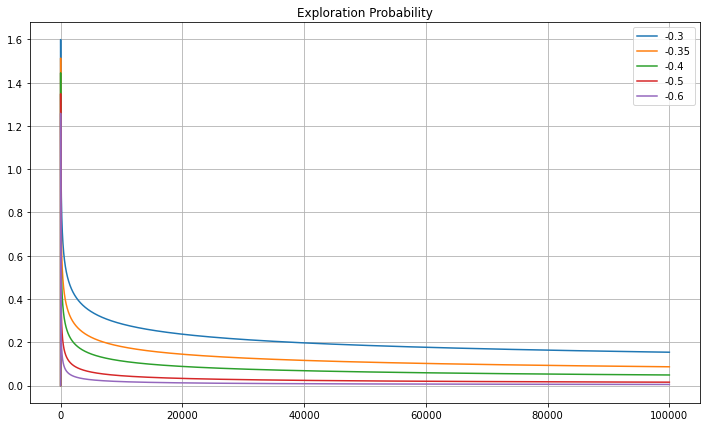

In [43]:
n_rounds = 100000
x = np.arange(1, 1 + n_rounds)
decays = [-0.3,-0.35, -2/5, -1/2, -3/5]
plt.figure(figsize = (12,7))
for d in decays:
    plt.plot(np.arange(1, 1 + n_rounds), [(x[i]**(d))*((10*np.log(x[i]))**(1/3)) for i in range(len(x))], label = d)
    plt.title('Exploration Probability')
    plt.legend()
plt.grid()
plt.savefig('Decay_Probabilites.pdf')
plt.show()

## Dirichlet

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.99s/it]


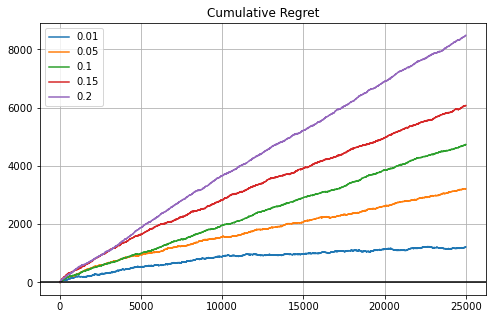

In [44]:
n_rounds = 25000
n_iterations = 10
dist = 'Dirichlet'
conc = 0.5
x = np.arange(1, 1 + n_rounds)
probs = [0.01, 0.05, 0.1, 0.15, 0.2]
plt.figure(figsize = (8,5))

for prob in probs:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc, prob = prob)[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = prob)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.62s/it]


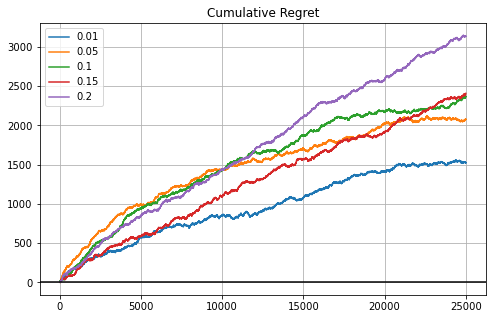

In [45]:
n_rounds = 25000
n_iterations = 10
dist = 'Dirichlet'
conc = 10
x = np.arange(1, 1 + n_rounds)
probs = [0.01, 0.05, 0.1, 0.15, 0.2]
plt.figure(figsize = (8,5))

for prob in probs:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc, prob = prob)[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = prob)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.06s/it]


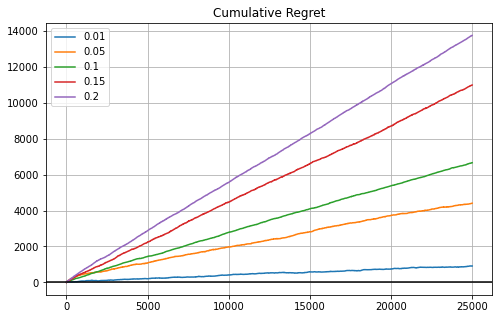

In [46]:
n_rounds = 25000
n_iterations = 10
dist = 'Dirichlet'
conc = 0.1
x = np.arange(1, 1 + n_rounds)
probs = [0.01, 0.05, 0.1, 0.15, 0.2]
plt.figure(figsize = (8,5))

for prob in probs:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc, prob = prob)[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = prob)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.36s/it]


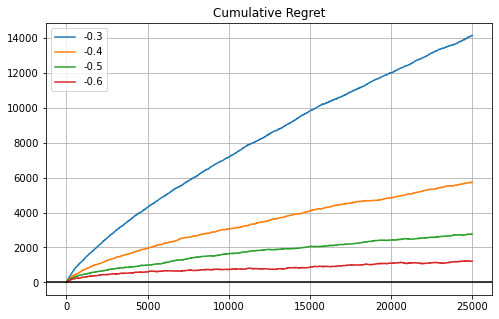

In [10]:
n_rounds = 25000
n_iterations = 10
dist = 'Dirichlet'
conc = 0.5
x = np.arange(1, 1 + n_rounds)
decays = [-0.3, -0.4, -0.5, -0.6]
plt.figure(figsize = (8,5))

for decay in decays:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc, prob = decay_prob(decay))[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = decay)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:23<00:00,  8.34s/it]


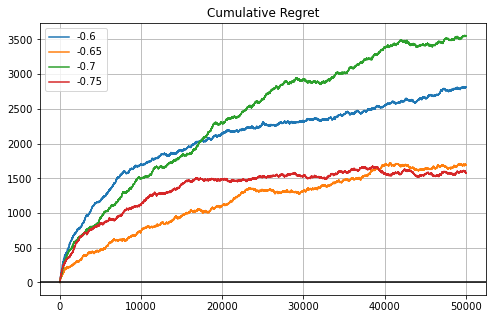

In [29]:
n_rounds = 50000
n_iterations = 10
dist = 'Dirichlet'
conc = 0.5
x = np.arange(1, 1 + n_rounds)
decays = [-0.6, -0.65, -0.7, -0.75]
plt.figure(figsize = (8,5))

for decay in decays:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc, prob = decay_prob(decay))[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = decay)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.56s/it]


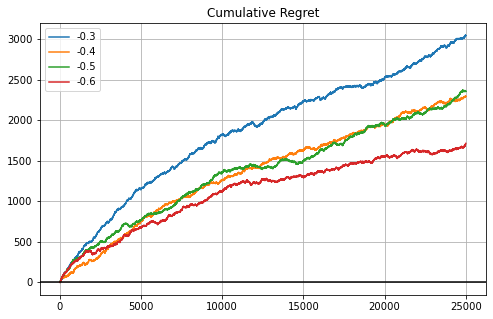

In [11]:
n_rounds = 25000
n_iterations = 10
dist = 'Dirichlet'
conc = 10
x = np.arange(1, 1 + n_rounds)
decays = [-0.3, -0.4, -0.5, -0.6]
plt.figure(figsize = (8,5))

for decay in decays:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc, prob = decay_prob(decay))[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = decay)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [03:12<00:00,  9.63s/it]


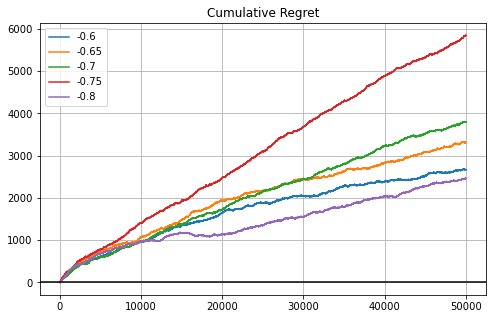

In [37]:
n_rounds = 50000
n_iterations = 20
dist = 'Dirichlet'
conc = 10
x = np.arange(1, 1 + n_rounds)
decays = [-0.6, -0.65, -0.7, -0.75, -0.8]
plt.figure(figsize = (8,5))

for decay in decays:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc, prob = decay_prob(decay))[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = decay)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.39s/it]


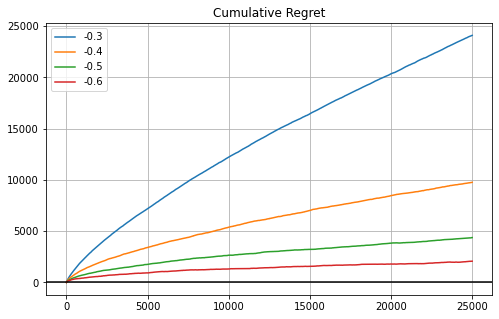

In [12]:
n_rounds = 25000
n_iterations = 10
dist = 'Dirichlet'
conc = 0.1
x = np.arange(1, 1 + n_rounds)
decays = [-0.3, -0.4, -0.5, -0.6]
plt.figure(figsize = (8,5))

for decay in decays:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc, prob = decay_prob(decay))[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = decay)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:54<00:00,  8.73s/it]


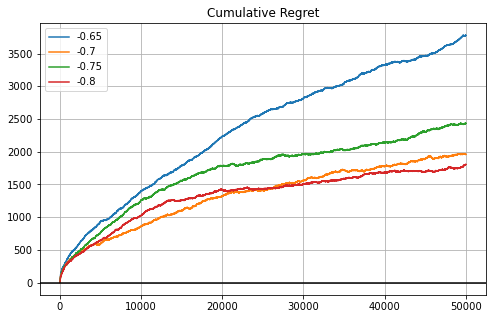

In [31]:
n_rounds = 50000
n_iterations = 20
dist = 'Dirichlet'
conc = 0.1
x = np.arange(1, 1 + n_rounds)
decays = [-0.65, -0.7, -0.75, -0.8]
plt.figure(figsize = (8,5))

for decay in decays:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc, prob = decay_prob(decay))[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = decay)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:43<00:00,  8.20s/it]


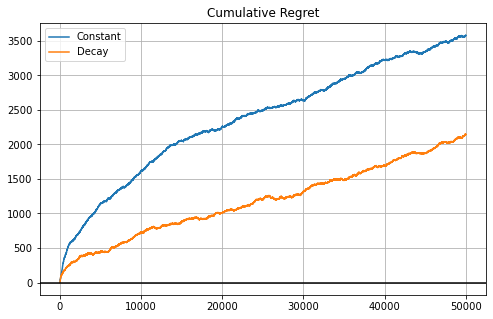

In [12]:
n_rounds = 50000
n_iterations = 20
dist = 'Dirichlet'
x = np.arange(1, 1 + n_rounds)
conc = 0.5
plt.figure(figsize = (8,5))
prob = 0.01
decay = -0.75
all_regrets_2 = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc, prob = decay_prob(decay))[0]
all_regrets_1 = all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc, prob = prob)[0]

plt.plot(x, all_regrets_1.mean(axis = 0), label = 'Constant')
plt.plot(x, all_regrets_2.mean(axis = 0), label = 'Decay')

plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [03:06<00:00,  9.32s/it]


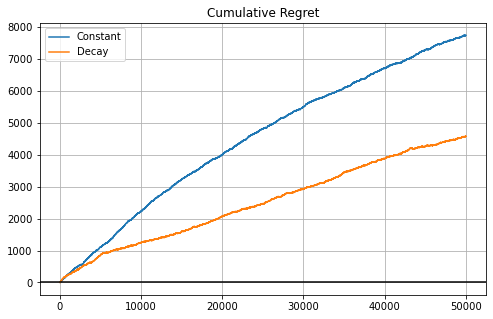

In [8]:
n_rounds = 50000
n_iterations = 20
dist = 'Dirichlet'
x = np.arange(1, 1 + n_rounds)
conc = 10
plt.figure(figsize = (8,5))
prob = 0.01
decay = -0.6
all_regrets_1 = all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc, prob = prob)[0]
all_regrets_2 = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc, prob = decay_prob(decay))[0]

plt.plot(x, all_regrets_1.mean(axis = 0), label = 'Constant')
plt.plot(x, all_regrets_2.mean(axis = 0), label = 'Decay')

plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [03:05<00:00,  9.27s/it]


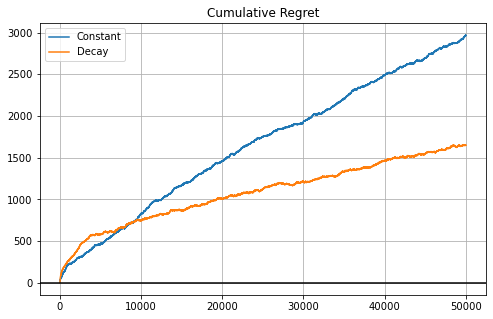

In [9]:
n_rounds = 50000
n_iterations = 20
dist = 'Dirichlet'
x = np.arange(1, 1 + n_rounds)
conc = 0.1
plt.figure(figsize = (8,5))
prob = 0.01
decay = -0.8
all_regrets_1 = all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc, prob = prob)[0]
all_regrets_2 = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc, prob = decay_prob(decay))[0]

plt.plot(x, all_regrets_1.mean(axis = 0), label = 'Constant')
plt.plot(x, all_regrets_2.mean(axis = 0), label = 'Decay')

plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

## Bernoulli

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.06s/it]


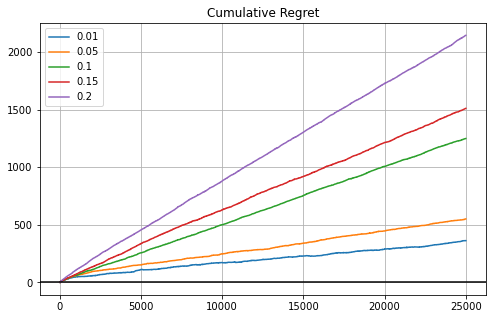

In [50]:
n_rounds = 25000
n_iterations = 10
dist = 'Bernoulli'
x = np.arange(1, 1 + n_rounds)
probs = [0.01, 0.05, 0.1, 0.15, 0.2]
plt.figure(figsize = (8,5))

for prob in probs:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = prob)[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = prob)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:30<00:00,  4.53s/it]


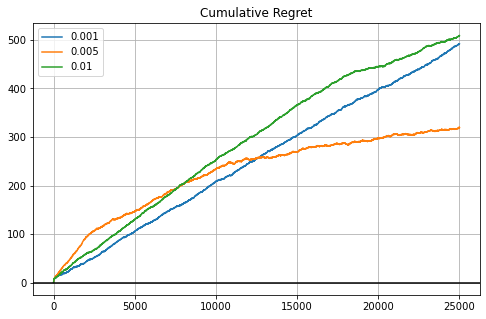

In [44]:
n_rounds = 25000
n_iterations = 20
dist = 'Bernoulli'
x = np.arange(1, 1 + n_rounds)
probs = [0.001, 0.005, 0.01]
plt.figure(figsize = (8,5))

for prob in probs:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = prob)[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = prob)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.07s/it]


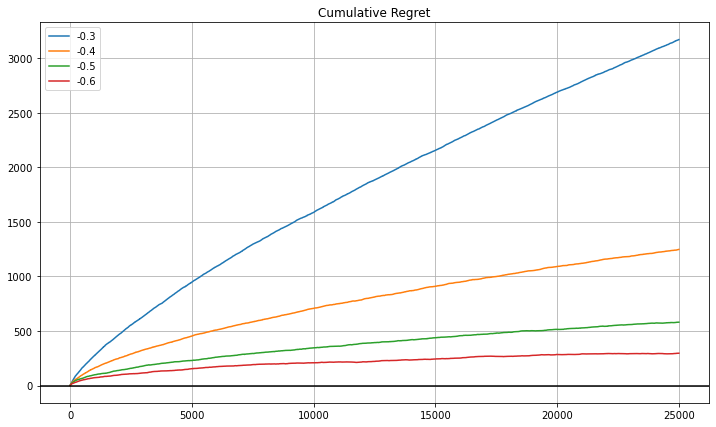

In [51]:
n_rounds = 25000
n_iterations = 10
dist = 'Bernoulli'
x = np.arange(1, 1 + n_rounds)
decays = [-0.3, -0.4, -0.5, -0.6]
plt.figure(figsize = (12,7))

for decay in decays:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = decay_prob(decay))[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = decay)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [03:07<00:00,  9.37s/it]


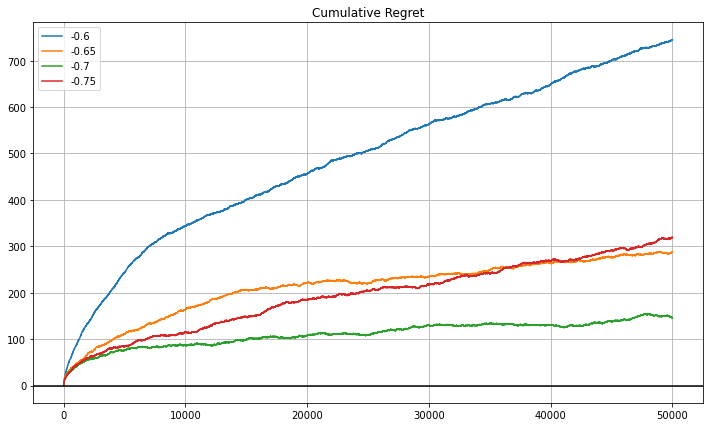

In [32]:
n_rounds = 50000
n_iterations = 20
dist = 'Bernoulli'
x = np.arange(1, 1 + n_rounds)
decays = [-0.6, -0.65, -0.7, -0.75]
plt.figure(figsize = (12,7))

for decay in decays:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = decay_prob(decay))[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = decay)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:10<00:00,  6.51s/it]


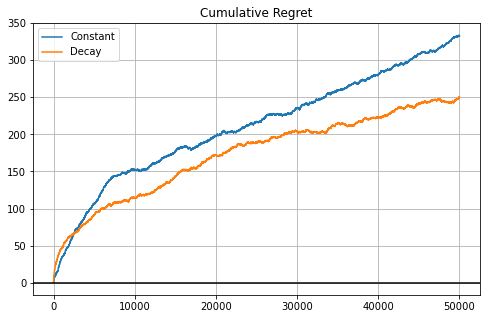

In [18]:
n_rounds = 50000
n_iterations = 20
dist = 'Bernoulli'
x = np.arange(1, 1 + n_rounds)
plt.figure(figsize = (8,5))
prob = 0.01
decay = -0.7
all_regrets_1 = all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, prob = prob)[0]
all_regrets_2 = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, prob = decay_prob(decay))[0]

plt.plot(x, all_regrets_1.mean(axis = 0), label = 'Constant')
plt.plot(x, all_regrets_2.mean(axis = 0), label = 'Decay')

plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

## Poisson

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:02<00:00,  3.13s/it]


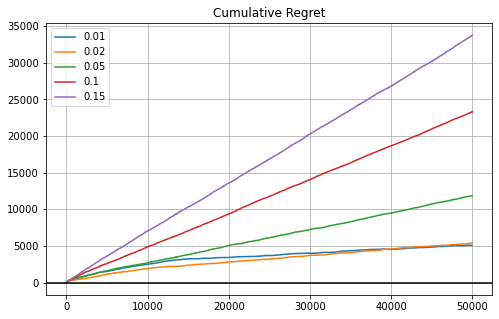

In [24]:
n_rounds = 50000
n_iterations = 20
dist = 'Poisson'
lambdas = np.arange(1,11,1)
x = np.arange(1, 1 + n_rounds)
probs = [0.01, 0.02, 0.05, 0.1, 0.15]
plt.figure(figsize = (8,5))

for prob in probs:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = prob)[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = prob)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:24<00:00,  1.24s/it]


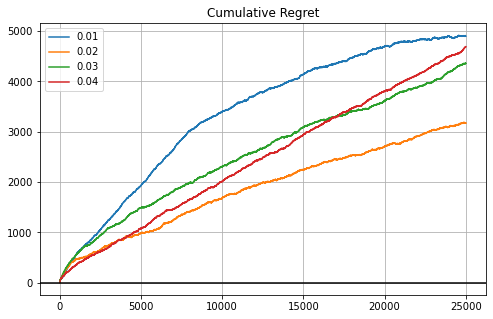

In [18]:
n_rounds = 25000
n_iterations = 20
dist = 'Poisson'
lambdas = np.arange(1,11,1)
x = np.arange(1, 1 + n_rounds)
probs = [0.01, 0.02, 0.03, 0.04]
plt.figure(figsize = (8,5))

for prob in probs:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = prob)[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = prob)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.39s/it]


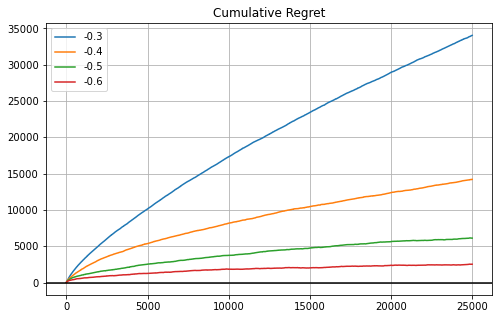

In [27]:
n_rounds = 25000
n_iterations = 10
dist = 'Poisson'
lambdas = np.arange(1,11,1)
x = np.arange(1, 1 + n_rounds)
decays = [-0.3, -0.4, -0.5, -0.6]
plt.figure(figsize = (8,5))

for decay in decays:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = decay_prob(decay))[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = decay)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:30<00:00,  1.55s/it]


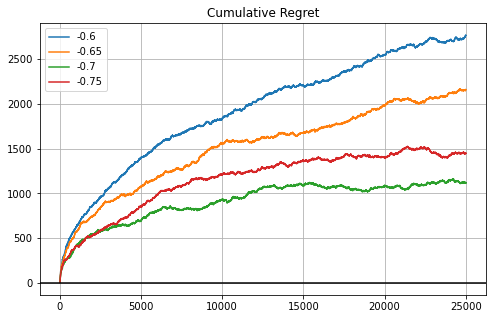

In [25]:
n_rounds = 25000
n_iterations = 20
dist = 'Poisson'
lambdas = np.arange(1,11,1)
x = np.arange(1, 1 + n_rounds)
decays = [-0.6, -0.65, -0.7, -0.75]
plt.figure(figsize = (8,5))

for decay in decays:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = decay_prob(decay))[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = decay)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:59<00:00,  2.97s/it]


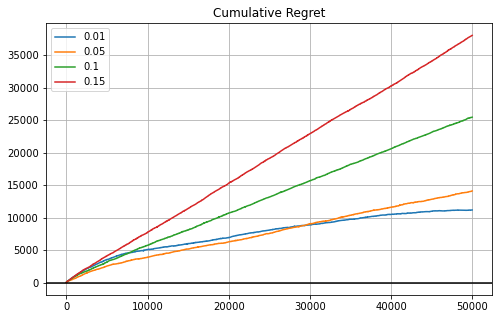

In [26]:
n_rounds = 50000
n_iterations = 20
dist = 'Poisson'
lambdas = np.arange(10,21,1)
x = np.arange(1, 1 + n_rounds)
probs = [0.01, 0.05, 0.1, 0.15]
plt.figure(figsize = (8,5))

for prob in probs:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = prob)[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = prob)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:56<00:00,  2.84s/it]


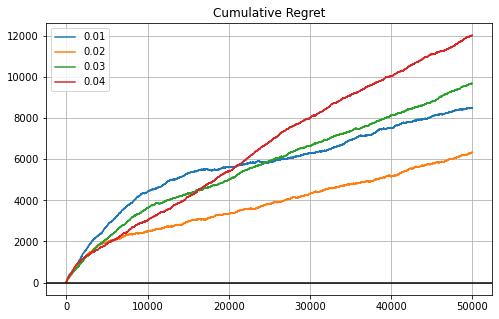

In [21]:
n_rounds = 50000
n_iterations = 20
dist = 'Poisson'
lambdas = np.arange(10,21,1)
x = np.arange(1, 1 + n_rounds)
probs = [0.01, 0.02, 0.03, 0.04]
plt.figure(figsize = (8,5))

for prob in probs:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = prob)[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = prob)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:55<00:00,  2.76s/it]


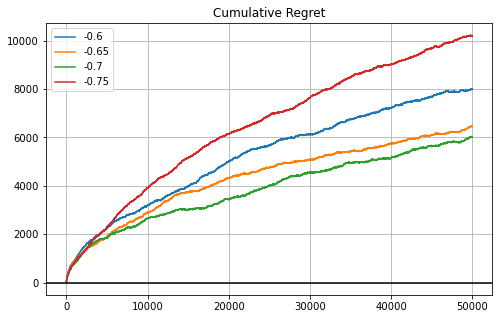

In [40]:
n_rounds = 50000
n_iterations = 20
dist = 'Poisson'
lambdas = np.arange(10,21,1)
x = np.arange(1, 1 + n_rounds)
decays = [-0.6, -0.65, -0.7, -0.75]
plt.figure(figsize = (8,5))

for decay in decays:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = decay_prob(decay))[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = decay)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:55<00:00,  2.79s/it]


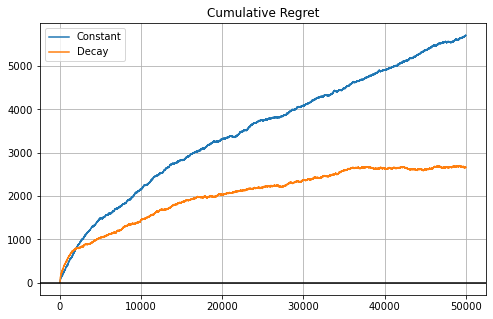

In [10]:
n_rounds = 50000
n_iterations = 20
dist = 'Poisson'
x = np.arange(1, 1 + n_rounds)
lambdas = np.arange(1,11,1)
plt.figure(figsize = (8,5))
prob = 0.02
decay = -0.7
all_regrets_1 = all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = prob)[0]
all_regrets_2 = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = decay_prob(decay))[0]

plt.plot(x, all_regrets_1.mean(axis = 0), label = 'Constant')
plt.plot(x, all_regrets_2.mean(axis = 0), label = 'Decay')

plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:05<00:00,  3.25s/it]


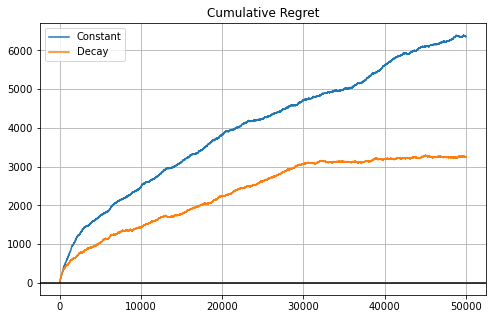

In [11]:
n_rounds = 50000
n_iterations = 20
dist = 'Poisson'
x = np.arange(1, 1 + n_rounds)
lambdas = np.arange(1,11,1)
plt.figure(figsize = (8,5))
prob = 0.02
decay = -0.7
all_regrets_1 = all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = prob)[0]
all_regrets_2 = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = decay_prob(decay))[0]

plt.plot(x, all_regrets_1.mean(axis = 0), label = 'Constant')
plt.plot(x, all_regrets_2.mean(axis = 0), label = 'Decay')

plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

## Exponential

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:57<00:00,  2.87s/it]


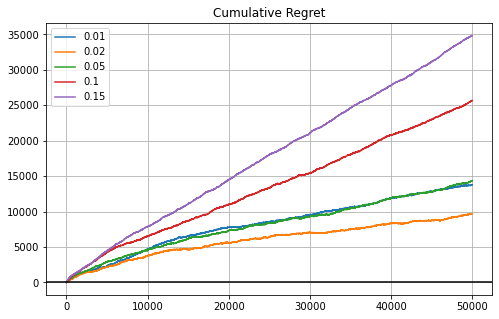

In [33]:
n_rounds = 50000
n_iterations = 20
dist = 'Exponential'
lambdas = np.arange(1,11,1)
x = np.arange(1, 1 + n_rounds)
probs = [0.01, 0.02, 0.05, 0.1, 0.15]
plt.figure(figsize = (8,5))

for prob in probs:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = prob)[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = prob)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:17<00:00,  1.70s/it]


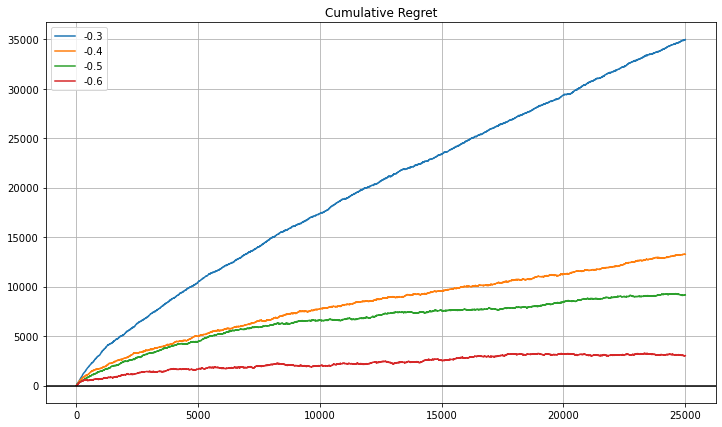

In [53]:
n_rounds = 25000
n_iterations = 10
dist = 'Exponential'
lambdas = np.arange(1,11,1)
x = np.arange(1, 1 + n_rounds)
decays = [-0.3, -0.4, -0.5, -0.6]
plt.figure(figsize = (12,7))

for decay in decays:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = decay_prob(decay))[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = decay)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:01<00:00,  3.09s/it]


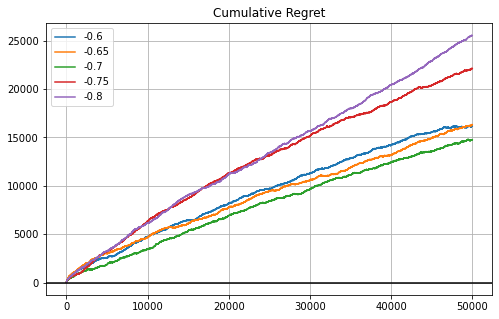

In [38]:
n_rounds = 50000
n_iterations = 20
dist = 'Exponential'
lambdas = np.arange(1,11,1)
x = np.arange(1, 1 + n_rounds)
decays = [-0.6, -0.65, -0.7, -0.75, -0.8]
plt.figure(figsize = (8,5))

for decay in decays:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = decay_prob(decay))[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = decay)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:00<00:00,  3.04s/it]


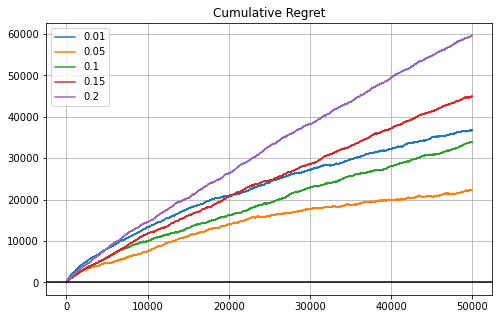

In [28]:
n_rounds = 50000
n_iterations = 20
dist = 'Exponential'
lambdas = np.arange(10,21,1)
x = np.arange(1, 1 + n_rounds)
probs = [0.01, 0.05, 0.1, 0.15, 0.2]
plt.figure(figsize = (8,5))

for prob in probs:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = prob)[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = prob)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:07<00:00,  3.37s/it]


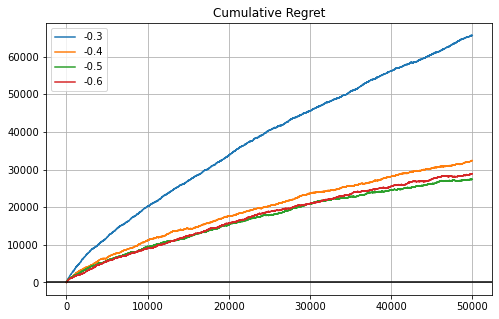

In [41]:
n_rounds = 50000
n_iterations = 20
dist = 'Exponential'
lambdas = np.arange(10,21,1)
x = np.arange(1, 1 + n_rounds)
decays = [-0.3, -0.4, -0.5, -0.6]
plt.figure(figsize = (8,5))

for decay in decays:
    all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = decay_prob(decay))[0]
    plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = decay)
    plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:49<00:00,  2.49s/it]


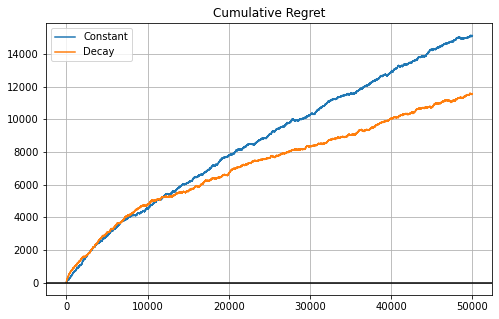

In [14]:
n_rounds = 50000
n_iterations = 20
dist = 'Exponential'
x = np.arange(1, 1 + n_rounds)
lambdas = np.arange(1,11,1)
plt.figure(figsize = (8,5))
prob = 0.02
decay = -0.7
all_regrets_1 = all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = prob)[0]
all_regrets_2 = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = decay_prob(decay))[0]

plt.plot(x, all_regrets_1.mean(axis = 0), label = 'Constant')
plt.plot(x, all_regrets_2.mean(axis = 0), label = 'Decay')

plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:38<00:00,  1.92s/it]


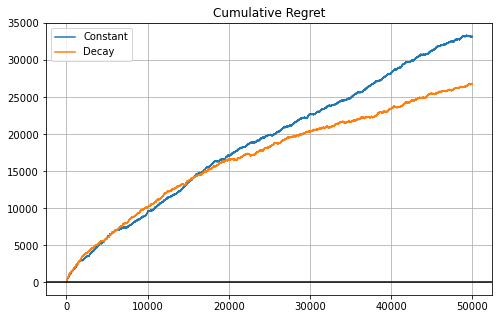

In [19]:
n_rounds = 50000
n_iterations = 20
dist = 'Exponential'
x = np.arange(1, 1 + n_rounds)
lambdas = np.arange(10,21,1)
plt.figure(figsize = (8,5))
prob = 0.02
decay = -0.5
all_regrets_1 = all_regrets = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = prob)[0]
all_regrets_2 = eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, prob = decay_prob(decay))[0]

plt.plot(x, all_regrets_1.mean(axis = 0), label = 'Constant')
plt.plot(x, all_regrets_2.mean(axis = 0), label = 'Decay')

plt.legend()
plt.axhline(0, color = 'black', label = '0')
plt.title('Cumulative Regret')
plt.grid()
plt.show()

# Soft-Max

In [71]:
def decay_temp(init_temp):
    return lambda x: init_temp/x

In [130]:
class softmax_player_new(player):
    def __init__(self, n_arms, temp, dist):
        super().__init__(n_arms)
        self.temp = temp
        self.probs = np.zeros(shape = n_arms)
        self.dist = dist
        
    def compute_probs(self, current_round):
        if type(self.temp) == float:
            den = np.sum(np.exp(self.means/self.temp))
            num = np.exp(self.means/self.temp)
        else:
            if self.dist == 'Bernoulli':
                min_value = 0.01
            else:
                min_value = 0.05
            if self.temp(current_round) < min_value: 
                final_temp = min_value
            else:
                final_temp = self.temp(current_round)
            den = np.sum(np.exp(self.means/final_temp))
            num = np.exp(self.means/final_temp)
        self.probs = num/den
        
        
    def choice(self):
        choice = np.random.choice(np.arange(self.n_arms), p = self.probs)
        self.choices.append(choice)
        return choice

In [131]:
def softmax_experiment_generation_new(n_rounds, n_iterations, temp, dist = 'Dirichlet', lambdas = None, conc = None):
    all_regrets = np.zeros(shape = (n_iterations, n_rounds))
    all_choices = np.zeros(shape = (n_iterations, n_rounds))
    
    for j in tqdm(range(n_iterations)):
        choices_rank = []
        if dist == 'Dirichlet':
            env = env_generation(n_arms = 10, n_variables = 10, conc = conc)
            ranked_means = sorted(env.all_means)
            player_1 = softmax_player_new(n_arms = env.n_arms, temp = temp, dist = dist)
        elif dist == 'Bernoulli':
            env = env_generation(n_arms = 10, n_variables = 2, dist = dist)
            ranked_means = sorted(env.all_means)
            player_1 = softmax_player_new(n_arms = env.n_arms, temp = temp, dist = dist)
        elif dist == 'Poisson' or dist == 'Exponential':
            player_1 = softmax_player_new(n_arms = len(lambdas),  temp = temp, dist = dist)
        for i in range(1, n_rounds + 1):
            if i <= player_1.n_arms:
                choice = i - 1
                player_1.choices.append(choice)
                
            else:
                player_1.compute_probs(i)
                choice = player_1.choice()
            
            if dist == 'Bernoulli' or dist == 'Dirichlet':
                choices_rank.append(ranked_means.index(env.all_means[choice]))

            if dist == 'Dirichlet' or dist == 'Bernoulli':
                best_reward = np.random.choice(env.rewards, p = env.probs_matrix[env.best_arm, :])
                reward = np.random.choice(env.rewards, p = env.probs_matrix[choice, :])
                
            elif dist == 'Poisson':
                best_reward = np.random.poisson(lam = lambdas[np.argmax(lambdas)])
                reward = np.random.poisson(lam = lambdas[choice])
            elif dist == 'Exponential':
                best_reward = np.random.exponential(scale = lambdas[np.argmax(lambdas)])
                reward = np.random.exponential(scale = lambdas[choice])
                
            player_1.update_n_trials(choice)
            player_1.update_mean(choice, reward)
            player_1.update_regret(reward, best_reward)
        all_regrets[j, :] = player_1.cumulative_regrets
        if dist == 'Dirichlet' or dist == 'Bernoulli':
            all_choices[j, :] = choices_rank
        else:
            all_choices[j, :] = player_1.choices
        
    return all_regrets, all_choices

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:24<00:00,  7.20s/it]


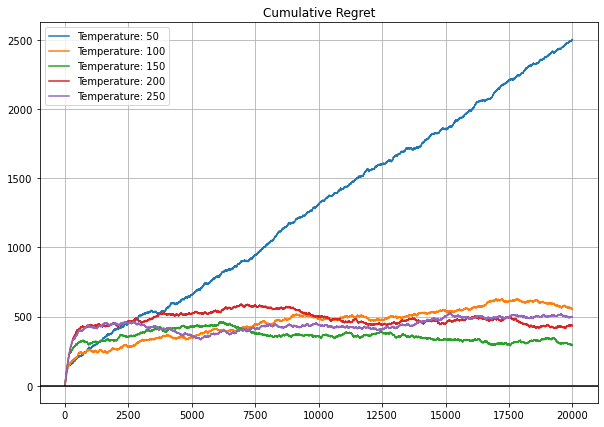

In [45]:
n_rounds = 20000
n_iterations = 20
temps = [50, 100, 150, 200, 250]
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 0.5, temp = decay_temp(temp))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:30<00:00,  7.53s/it]


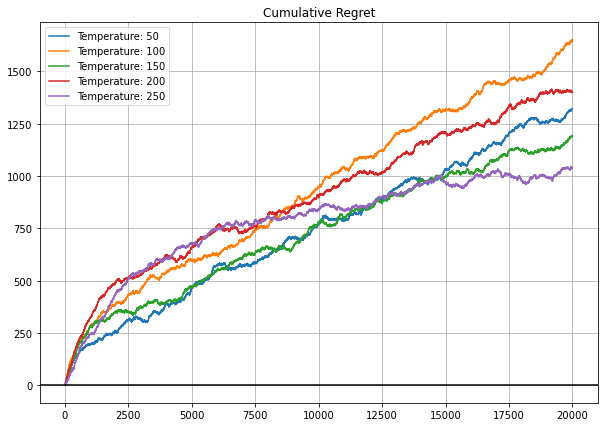

In [46]:
n_rounds = 20000
n_iterations = 20
temps = [50, 100, 150, 200, 250]
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 10, temp = decay_temp(temp))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:21<00:00,  7.10s/it]


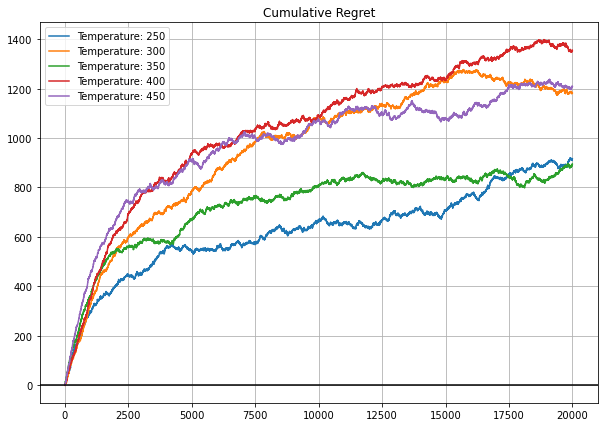

In [58]:
n_rounds = 20000
n_iterations = 20
temps = [250,300,350,400,450]
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 10, temp = decay_temp(temp))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:41<00:00,  8.09s/it]


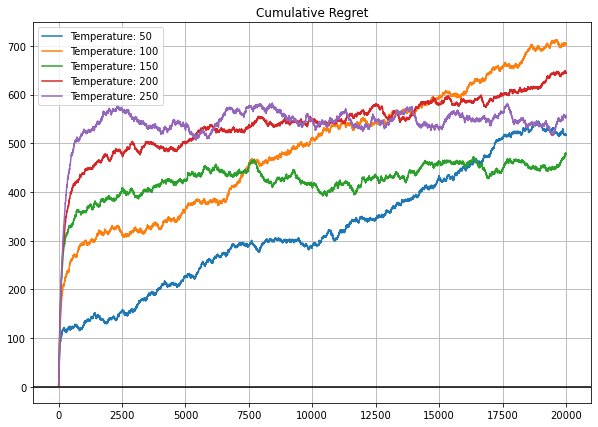

In [47]:
n_rounds = 20000
n_iterations = 20
temps = [50, 100, 150, 200, 250]
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 0.1, temp = decay_temp(temp))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:52<00:00,  7.74s/it]


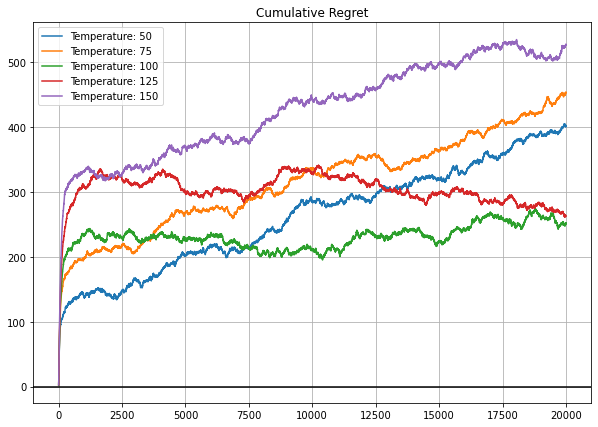

In [114]:
n_rounds = 20000
n_iterations = 30
temps = [50, 75, 100, 125,150]
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 0.1, temp = decay_temp(temp))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:37<00:00,  7.90s/it]


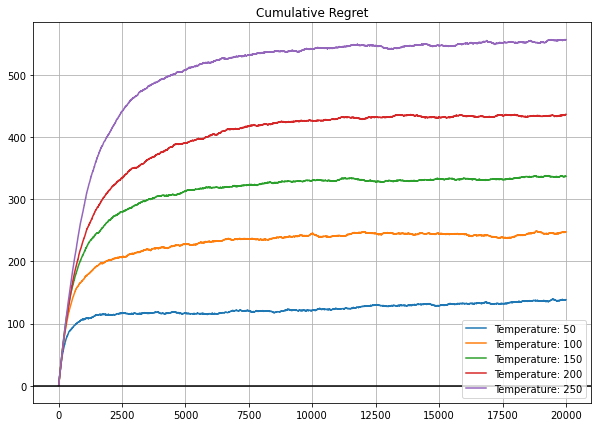

In [132]:
n_rounds = 20000
n_iterations = 20
temps = [50, 100, 150, 200, 250]
dist = 'Bernoulli'
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:13<00:00,  6.66s/it]


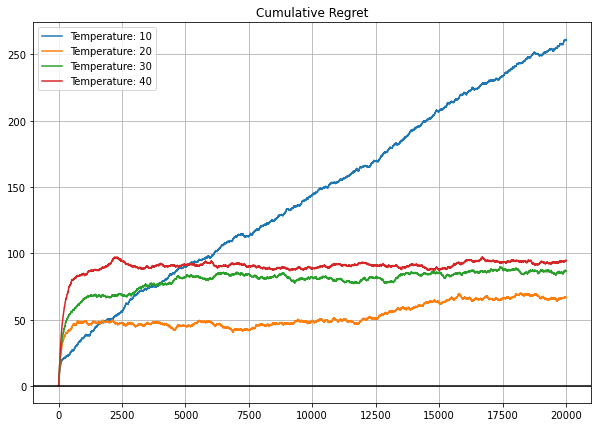

In [133]:
n_rounds = 20000
n_iterations = 20
temps = [10,20,30,40]
dist = 'Bernoulli'
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:15<00:00,  6.78s/it]


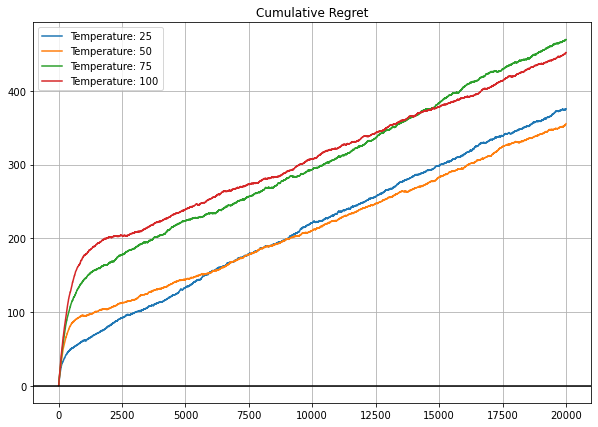

In [59]:
n_rounds = 20000
n_iterations = 20
temps = [25,50,75,100]
dist = 'Bernoulli'
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:27<00:00,  4.39s/it]


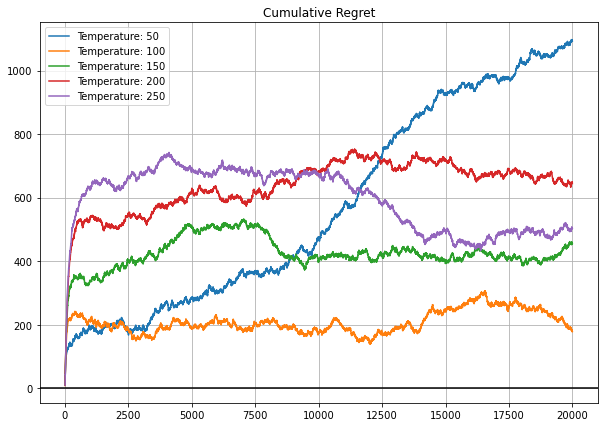

In [49]:
n_rounds = 20000
n_iterations = 20
temps = [50, 100, 150, 200, 250]
dist = 'Poisson'
lambdas = np.arange(1,11,1)
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:14<00:00,  4.48s/it]


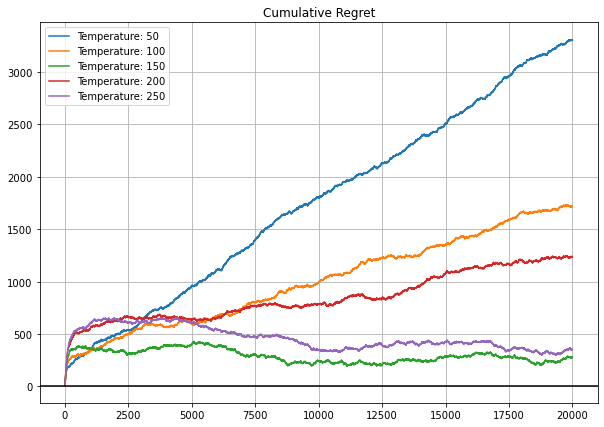

In [115]:
n_rounds = 20000
n_iterations = 30
temps = [50, 100, 150, 200, 250]
dist = 'Poisson'
lambdas = np.arange(10,21,1)
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:10<00:00,  4.34s/it]


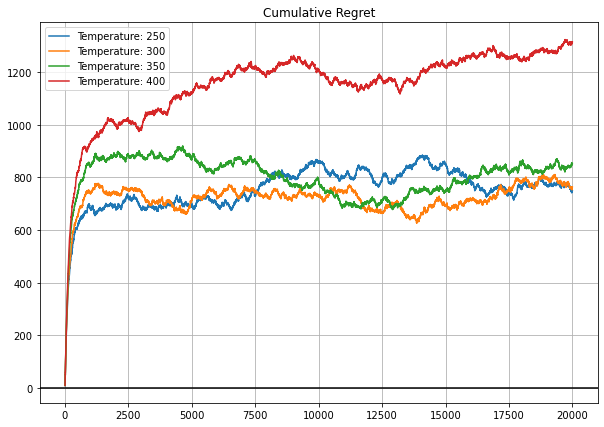

In [116]:
n_rounds = 20000
n_iterations = 30
temps = [250,300,350,400]
dist = 'Poisson'
lambdas = np.arange(10,21,1)
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:10<00:00,  3.53s/it]


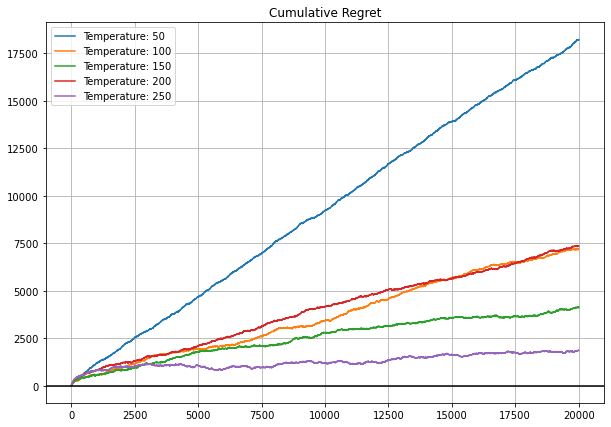

In [51]:
n_rounds = 20000
n_iterations = 20
temps = [50, 100, 150, 200, 250]
dist = 'Exponential'
lambdas = np.arange(1,11,1)
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:18<00:00,  3.96s/it]


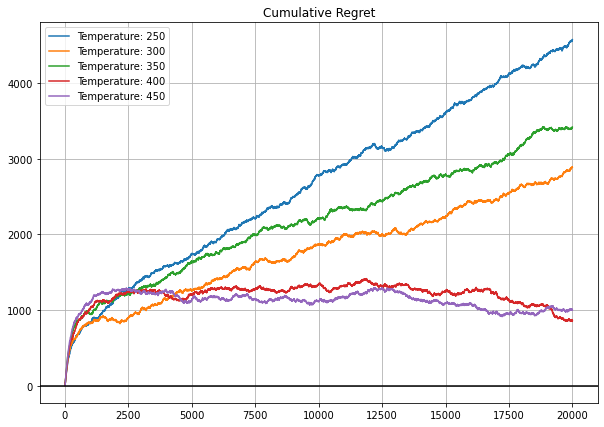

In [61]:
n_rounds = 20000
n_iterations = 50
temps = [250,300,350,400, 450]
dist = 'Exponential'
lambdas = np.arange(1,11,1)
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:35<00:00,  4.31s/it]


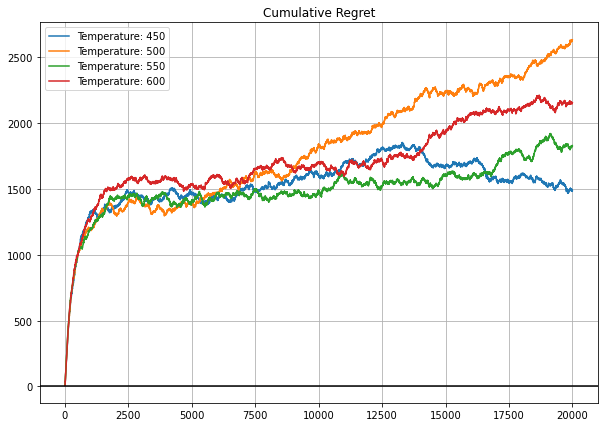

In [117]:
n_rounds = 20000
n_iterations = 50
temps = [450,500,550,600]
dist = 'Exponential'
lambdas = np.arange(1,11,1)
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:11<00:00,  3.56s/it]


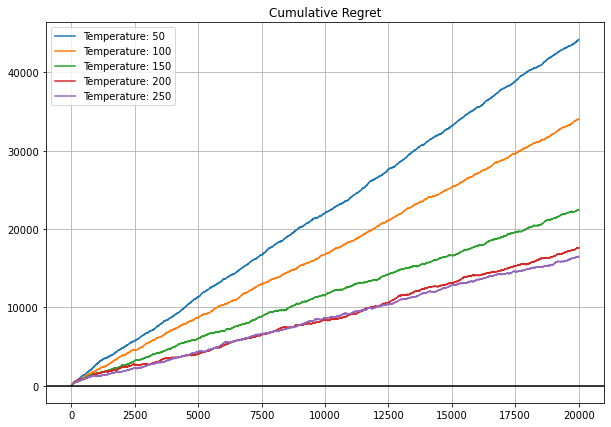

In [52]:
n_rounds = 20000
n_iterations = 20
temps = [50, 100, 150, 200, 250]
dist = 'Exponential'
lambdas = np.arange(10,21,1)
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:22<00:00,  4.14s/it]


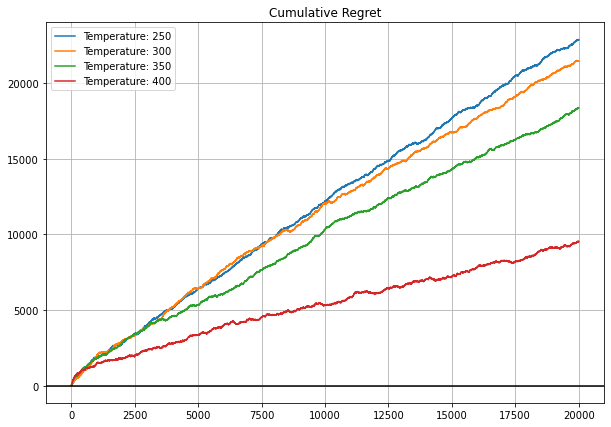

In [53]:
n_rounds = 20000
n_iterations = 20
temps = [250,300,350,400]
dist = 'Exponential'
lambdas = np.arange(10,21,1)
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:15<00:00,  4.53s/it]


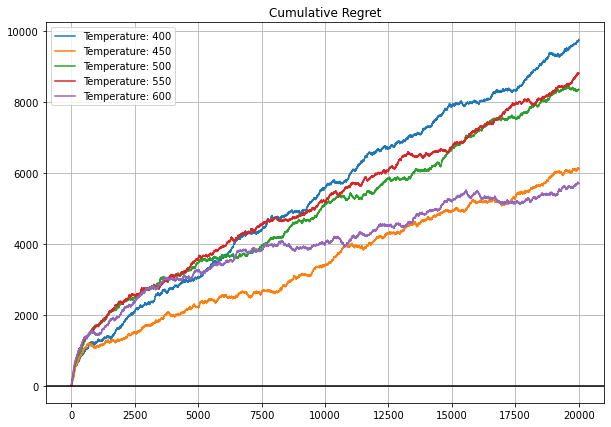

In [62]:
n_rounds = 20000
n_iterations = 30
temps = [400,450,500,550,600]
dist = 'Exponential'
lambdas = np.arange(10,21,1)
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:36<00:00,  5.22s/it]


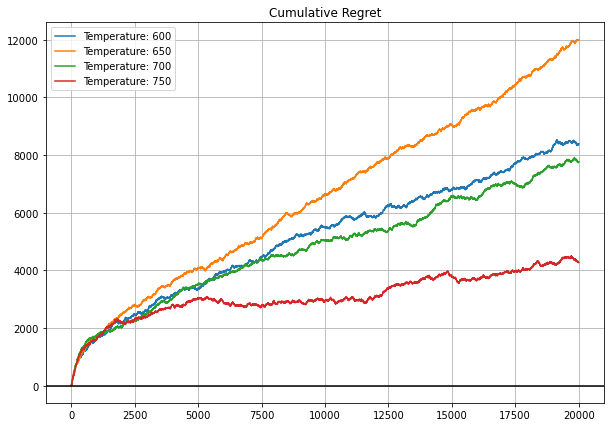

In [63]:
n_rounds = 20000
n_iterations = 30
temps = [600, 650, 700, 750]
dist = 'Exponential'
lambdas = np.arange(10,21,1)
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:49<00:00,  5.64s/it]


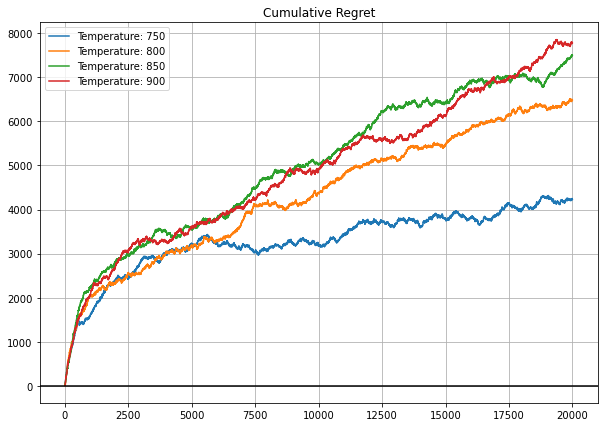

In [64]:
n_rounds = 20000
n_iterations = 30
temps = [750,800,850,900]
dist = 'Exponential'
lambdas = np.arange(10,21,1)
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:07<00:00,  6.38s/it]


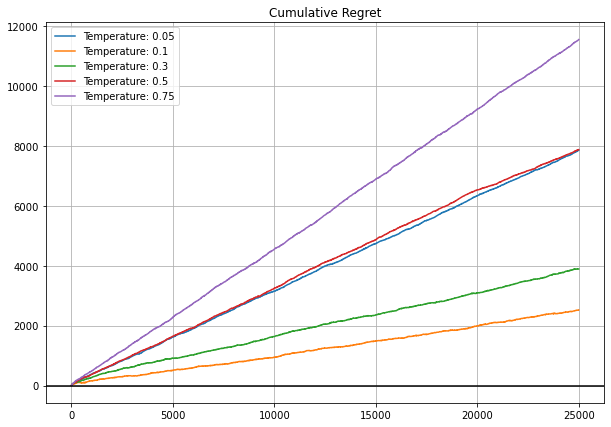

In [43]:
n_rounds = 25000
n_iterations = 20
temps = [0.05, 0.1, 0.3, 0.5, 0.75]
labels = [f'Temperature: {i}' for i in temps]
x = []
y = []

for temp in temps:
    all_regrets, all_choices = softmax_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, conc = 0.5, temp = temp)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [04:37<00:00, 13.90s/it]


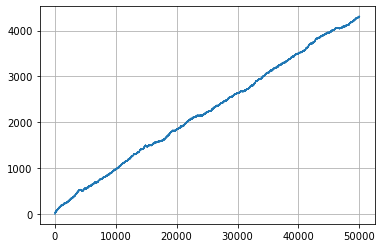

In [46]:
n_rounds = 50000
n_iterations = 20
all_regrets, all_choices = softmax_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, conc = 0.5, temp = 0.1)
x = np.arange(1, n_rounds + 1)
plt.plot(x, all_regrets.mean(axis = 0))
plt.grid()
plt.show()

# SoftMax-Eps

In [135]:
class soft_eps_player_new(eps_player_new):
    def __init__(self, n_arms, prob, temp, dist):
        super().__init__(n_arms, prob)
        self.temp = temp
        self.dist = dist
        
    def choice(self, exp, current_round):
        if exp == 'Exploration':
            if type(self.temp) == float:
                den = np.sum(np.exp(self.means/self.temp))
                num = np.exp(self.means/self.temp)
            else:
                if self.dist == 'Bernoulli':
                    min_value = 0.01
                else:
                    min_value = 0.05
                if self.temp(current_round) < min_value: 
                    final_temp = min_value
                else:
                    final_temp = self.temp(current_round)
                den = np.sum(np.exp(self.means/final_temp))
                num = np.exp(self.means/final_temp)
            self.probs = num/den
            choice = np.random.choice(np.arange(self.n_arms), p = num/den)
        else:
            choice = np.argmax(self.means)
        self.choices.append(choice)
        return choice

In [136]:
def softmax_eps_experiment_generation_new(n_rounds, n_iterations, temp, prob, dist = 'Dirichlet', conc = None, lambdas = None):
    all_regrets = np.zeros(shape = (n_iterations, n_rounds))
    all_choices = np.zeros(shape = (n_iterations, n_rounds))
    
    for j in tqdm(range(n_iterations)):
        choices_rank = []
        if dist == 'Dirichlet':
            env = env_generation(n_arms = 10, n_variables = 10, conc = conc)
            ranked_means = sorted(env.all_means)
            player_1 = soft_eps_player_new(n_arms = env.n_arms, temp = temp, prob = prob, dist = dist)
        elif dist == 'Bernoulli':
            env = env_generation(n_arms = 10, n_variables = 2, dist = dist)
            ranked_means = sorted(env.all_means)
            player_1 = soft_eps_player_new(n_arms = env.n_arms, temp = temp, prob = prob, dist = dist)
        elif dist == 'Poisson' or dist == 'Exponential':
            player_1 = soft_eps_player_new(n_arms = len(lambdas),  temp = temp, prob = prob, dist = dist)
            
        for i in range(1, n_rounds + 1):
            if i <= player_1.n_arms:
                choice = i - 1
                player_1.choices.append(choice)
            else:
                exp = player_1.exp_vs_exp(i)
                choice = player_1.choice(exp, i)
                
            if dist == 'Dirichlet' or dist == 'Bernoulli':
                choices_rank.append(ranked_means.index(env.all_means[choice]))

            if dist == 'Dirichlet' or dist == 'Bernoulli':
                best_reward = np.random.choice(env.rewards, p = env.probs_matrix[env.best_arm, :])
                reward = np.random.choice(env.rewards, p = env.probs_matrix[choice, :])
                
            elif dist == 'Poisson':
                best_reward = np.random.poisson(lam = lambdas[np.argmax(lambdas)])
                reward = np.random.poisson(lam = lambdas[choice])
            elif dist == 'Exponential':
                best_reward = np.random.exponential(scale = lambdas[np.argmax(lambdas)])
                reward = np.random.exponential(scale = lambdas[choice])
                
            player_1.update_n_trials(choice)
            player_1.update_mean(choice, reward)
            player_1.update_regret(reward, best_reward)
        all_regrets[j, :] = player_1.cumulative_regrets
        if dist == 'Dirichlet' or dist == 'Bernoulli':
            all_choices[j, :] = choices_rank
        else:
            all_choices[j, :] = player_1.choices
        
    return all_regrets, all_choices

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:46<00:00,  5.33s/it]


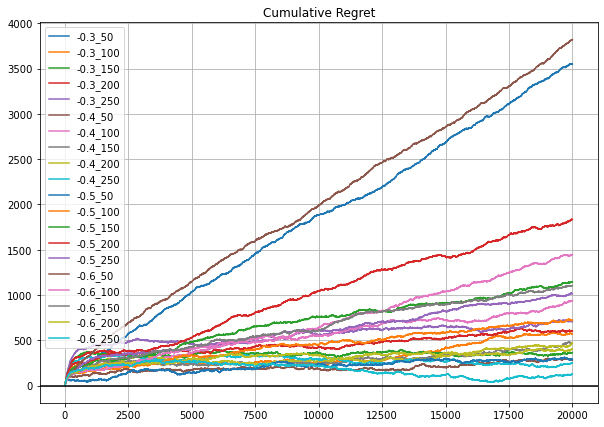

In [81]:
n_rounds = 20000
n_iterations = 20
temps = [50, 100, 150, 200, 250]
decays = [-0.3, -0.4, -0.5, -0.6]
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 0.5, temp = decay_temp(temp), prob = decay_prob(decay))
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:30<00:00,  7.03s/it]


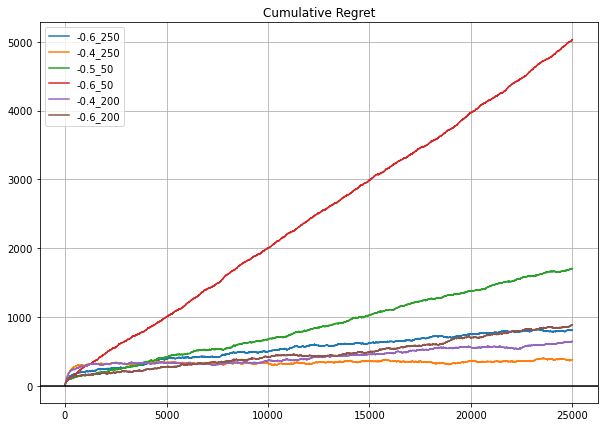

In [109]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.6, 250), (-0.4, 250), (-0.5,50), (-0.6,50), (-0.4,200), (-0.6,200)]
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 0.5, temp = decay_temp(temp), prob = decay_prob(decay))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:51<00:00,  5.57s/it]


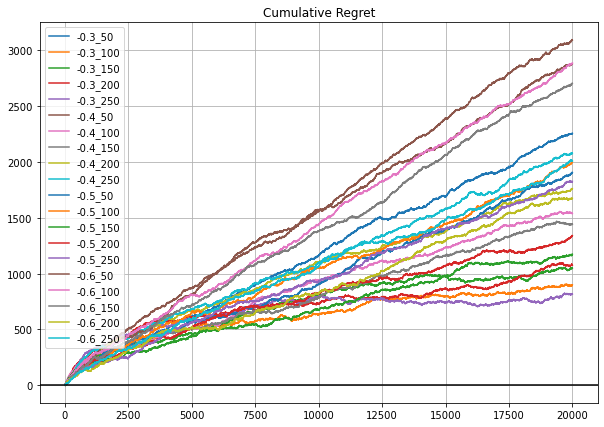

In [82]:
n_rounds = 20000
n_iterations = 20
temps = [50, 100, 150, 200, 250]
decays = [-0.3, -0.4, -0.5, -0.6]
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 10, temp = decay_temp(temp), prob = decay_prob(decay))
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [05:16<00:00, 10.56s/it]


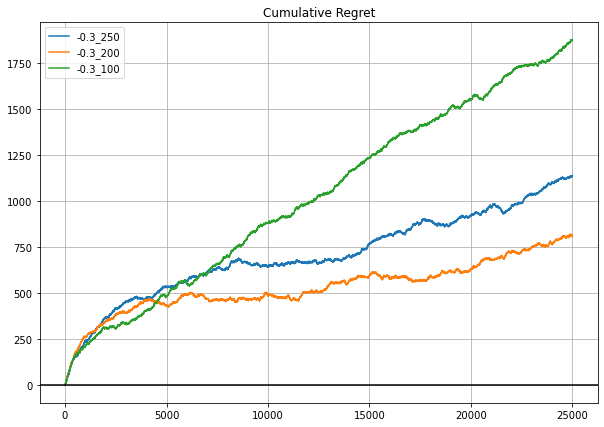

In [100]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.3, 250), (-0.3, 200), (-0.3, 100)]
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 10, temp = decay_temp(temp), prob = decay_prob(decay))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:49<00:00,  5.49s/it]


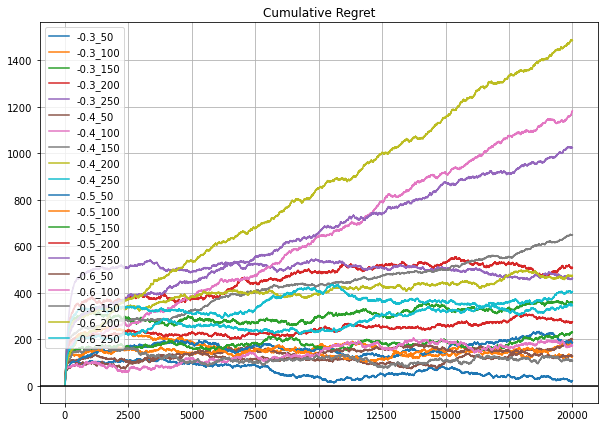

In [83]:
n_rounds = 20000
n_iterations = 20
temps = [50, 100, 150, 200, 250]
decays = [-0.3, -0.4, -0.5, -0.6]
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 0.1, temp = decay_temp(temp), prob = decay_prob(decay))
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:10<00:00,  6.34s/it]


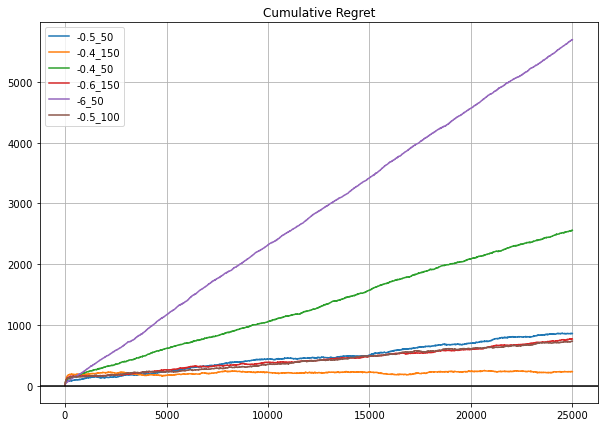

In [111]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.5,50), (-0.4, 150), (-0.4, 50), (-0.6,150),(-0-6, 50), (-0.5,100)]
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 0.1, temp = decay_temp(temp), prob = decay_prob(decay))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:48<00:00,  5.44s/it]


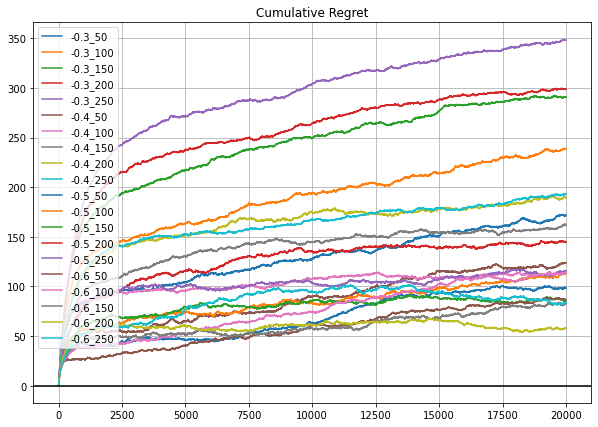

In [84]:
n_rounds = 20000
n_iterations = 20
temps = [50, 100, 150, 200, 250]
decays = [-0.3, -0.4, -0.5, -0.6]
dist = 'Bernoulli'
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay))
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:29<00:00,  7.00s/it]


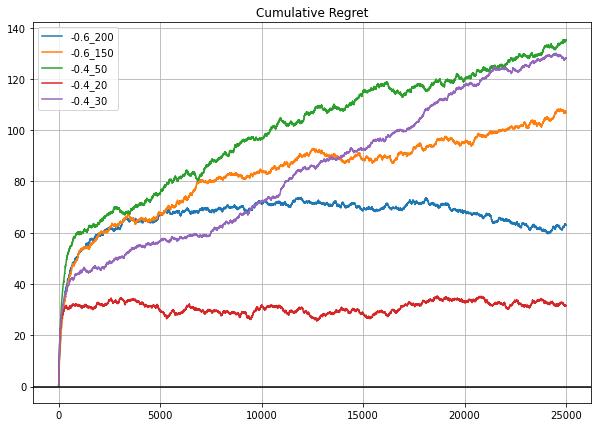

In [138]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.6, 200), (-0.6, 150), (-0.4, 50), (-0.4, 20), (-0.4,30)]
dist = 'Bernoulli'
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:36<00:00,  1.83s/it]


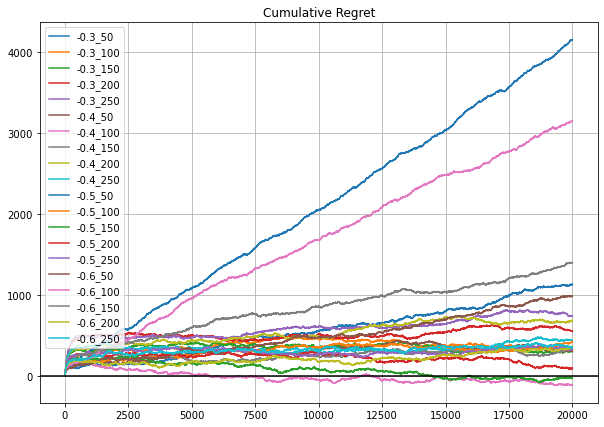

In [85]:
n_rounds = 20000
n_iterations = 20
temps = [50, 100, 150, 200, 250]
decays = [-0.3, -0.4, -0.5, -0.6]
dist = 'Poisson'
lambdas = np.arange(1,11,1)
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:13<00:00,  4.44s/it]


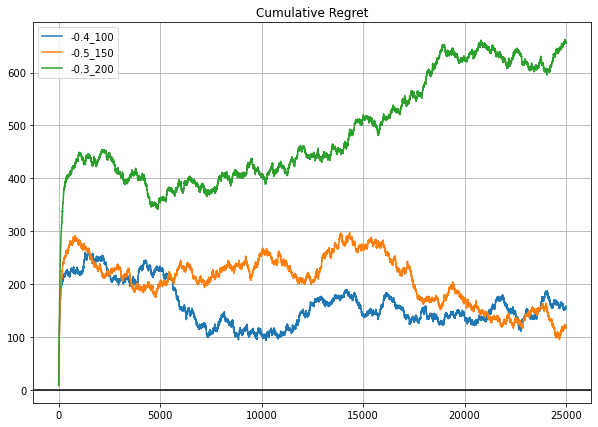

In [103]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.4, 100), (-0.5, 150), (-0.3, 200)]
dist = 'Poisson'
lambdas = np.arange(1,11,1)
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:35<00:00,  1.80s/it]


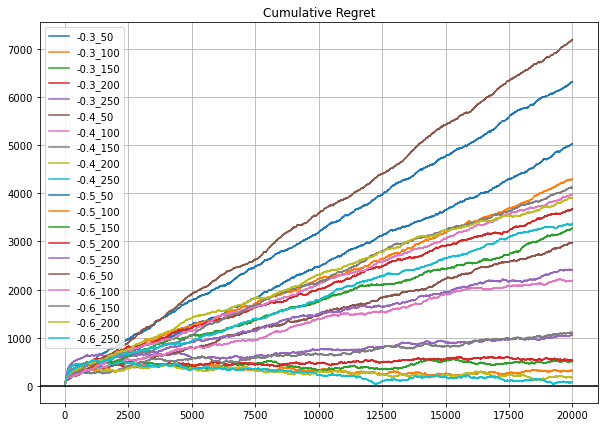

In [86]:
n_rounds = 20000
n_iterations = 20
temps = [50, 100, 150, 200, 250]
decays = [-0.3, -0.4, -0.5, -0.6]
dist = 'Poisson'
lambdas = np.arange(10,21,1)
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:18<00:00,  4.61s/it]


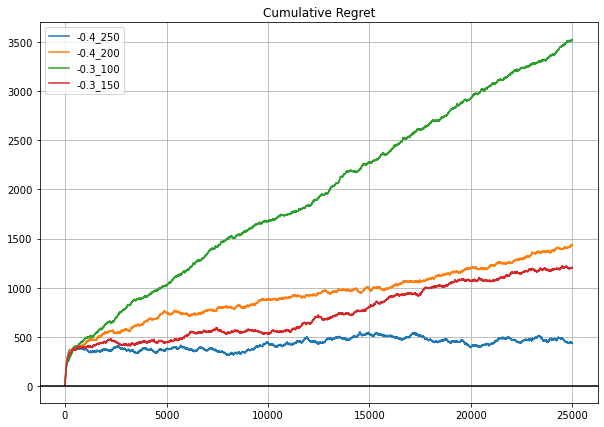

In [104]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.4, 250), (-0.4,200), (-0.3, 100), (-0.3, 150)]
dist = 'Poisson'
lambdas = np.arange(10,21,1)
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:36<00:00,  1.84s/it]


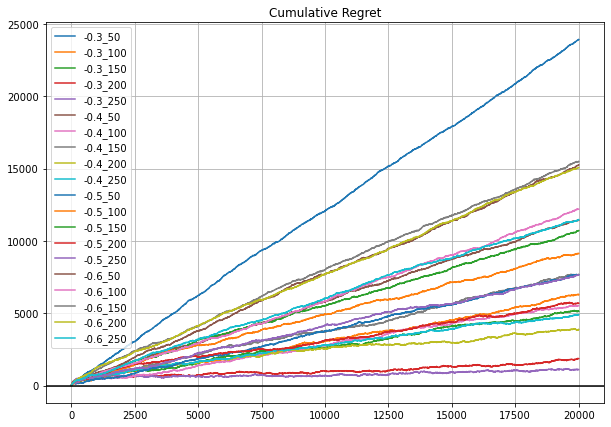

In [88]:
n_rounds = 20000
n_iterations = 20
temps = [50, 100, 150, 200, 250]
decays = [-0.3, -0.4, -0.5, -0.6]
dist = 'Exponential'
lambdas = np.arange(1,11,1)
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:30<00:00,  1.54s/it]


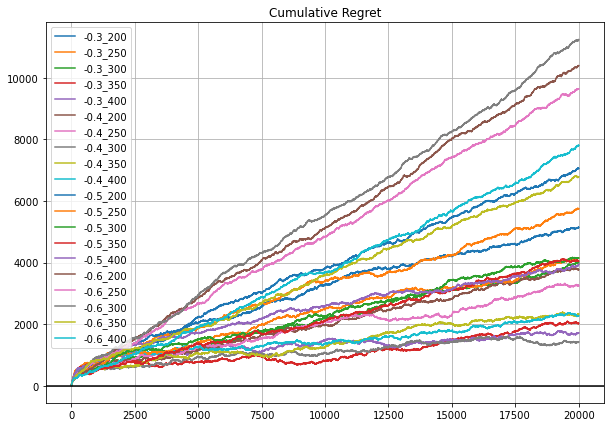

In [113]:
n_rounds = 20000
n_iterations = 20
temps = [200,250,300,350,400]
decays = [-0.3, -0.4, -0.5, -0.6]
dist = 'Exponential'
lambdas = np.arange(1,11,1)
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:42<00:00,  3.41s/it]


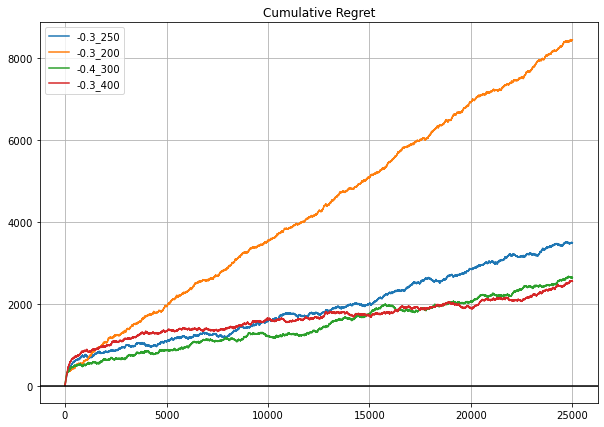

In [118]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.3, 250), (-0.3, 200), (-0.4, 300), (-0.3,400)]
dist = 'Exponential'
lambdas = np.arange(1,11,1)
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:55<00:00,  3.86s/it]


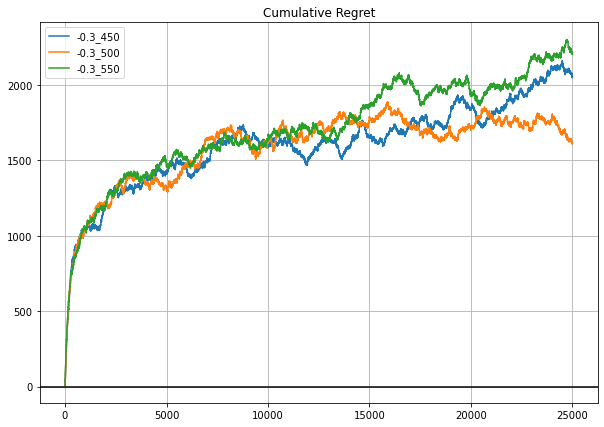

In [120]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.3, 450), (-0.3, 500), (-0.3, 550)]
dist = 'Exponential'
lambdas = np.arange(1,11,1)
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:40<00:00,  2.04s/it]


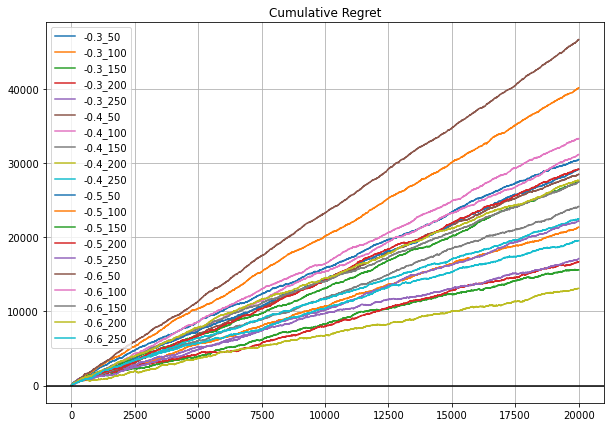

In [87]:
n_rounds = 20000
n_iterations = 20
temps = [50, 100, 150, 200, 250]
decays = [-0.3, -0.4, -0.5, -0.6]
dist = 'Exponential'
lambdas = np.arange(10,21,1)
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:41<00:00,  3.40s/it]


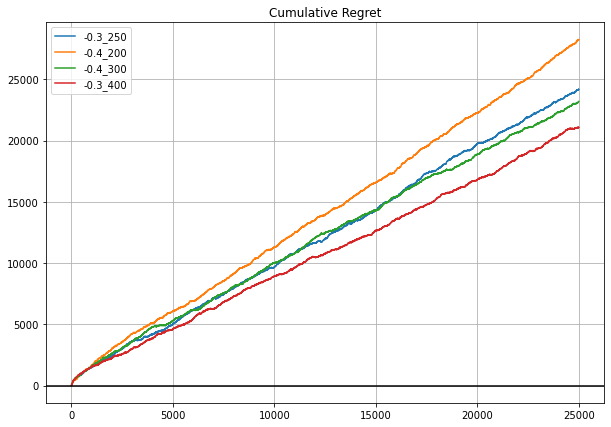

In [119]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.3, 250), (-0.4, 200), (-0.4, 300), (-0.3,400)]
dist = 'Exponential'
lambdas = np.arange(10,21,1)
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:05<00:00,  2.19s/it]


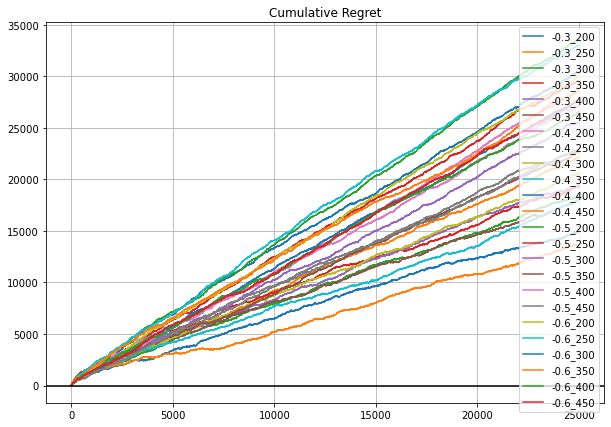

In [121]:
n_rounds = 25000
n_iterations = 30
temps = [200,250,300,350,400,450]
decays = [-0.3, -0.4, -0.5, -0.6]
dist = 'Exponential'
lambdas = np.arange(10,21,1)
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:18<00:00,  2.60s/it]


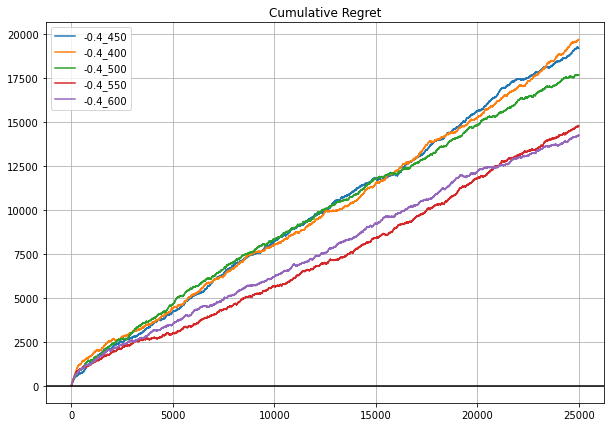

In [124]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.4, 450), (-0.4, 400),(-0.4,500), (-0.4,550), (-0.4,600)]
dist = 'Exponential'
lambdas = np.arange(10,21,1)
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:12<00:00,  2.42s/it]


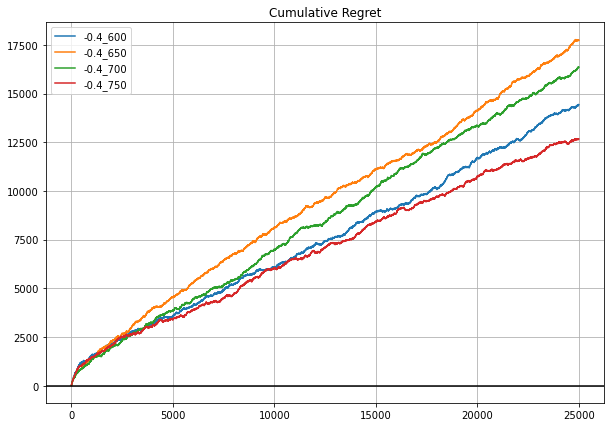

In [125]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.4, 600), (-0.4, 650), (-0.4, 700), (-0.4, 750)]
dist = 'Exponential'
lambdas = np.arange(10,21,1)
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:44<00:00,  3.48s/it]


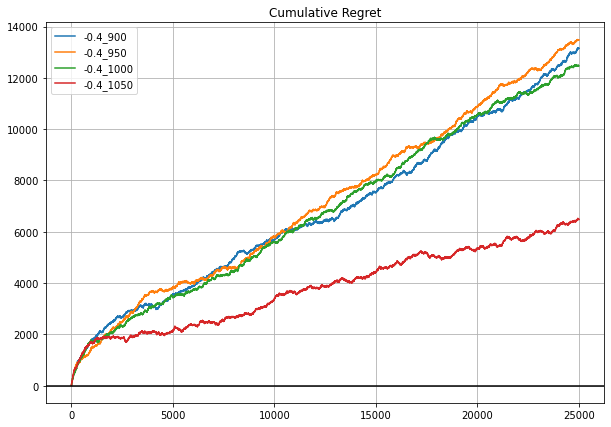

In [127]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.4, 900), (-0.4, 950), (-0.4, 1000), (-0.4, 1050)]
dist = 'Exponential'
lambdas = np.arange(10,21,1)
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:25<00:00,  2.84s/it]


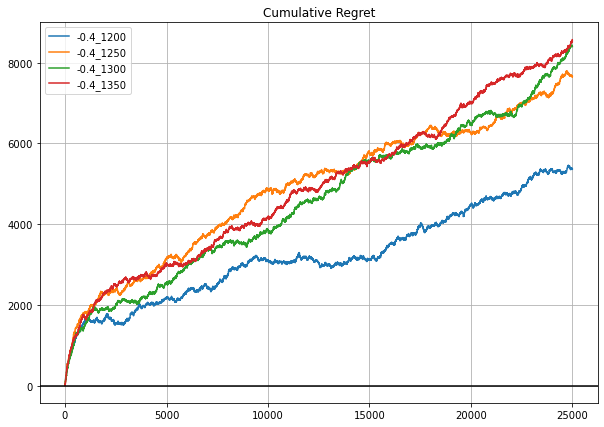

In [129]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.4, 1200), (-0.4, 1250), (-0.4, 1300), (-0.4, 1350)]
dist = 'Exponential'
lambdas = np.arange(10,21,1)
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

## Constant Temperatures

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:41<00:00,  5.10s/it]


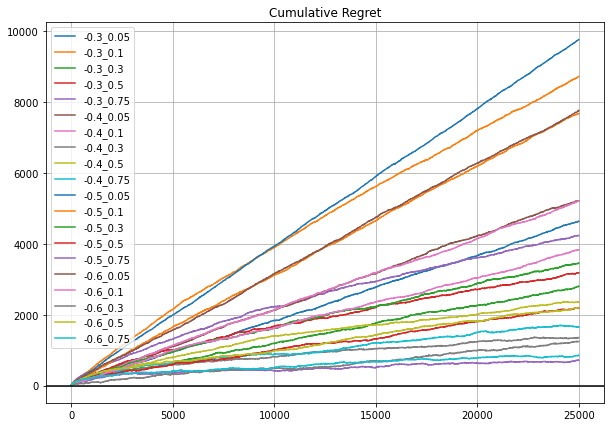

In [259]:
n_rounds = 25000
n_iterations = 20
temps = [0.05, 0.1, 0.3, 0.5, 0.75]
decays = [-0.3, -0.4, -0.5, -0.6]
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 0.5, temp = temp, prob = decay_prob(decay))
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:38<00:00,  4.93s/it]


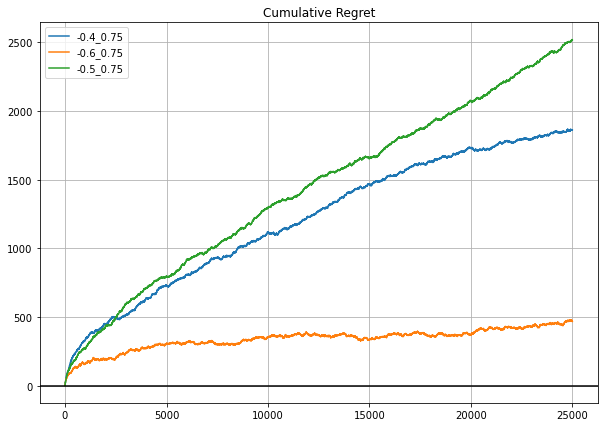

In [299]:
n_rounds = 25000
n_iterations = 20
pairs = [(-0.4, 0.75), (-0.6, 0.75), (-0.5, 0.75)]
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 0.5, temp = temp, prob = decay_prob(decay))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:10<00:00,  6.54s/it]


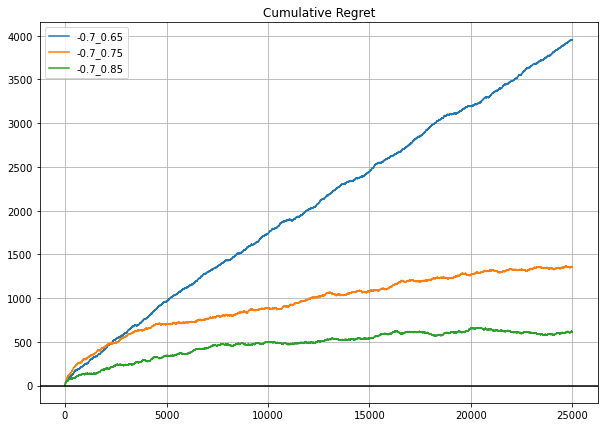

In [327]:
n_rounds = 25000
n_iterations = 20
pairs = [(-0.7, 0.65), (-0.7, 0.75), (-0.7, 0.85)]
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 0.5, temp = temp, prob = decay_prob(decay))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:41<00:00,  5.06s/it]


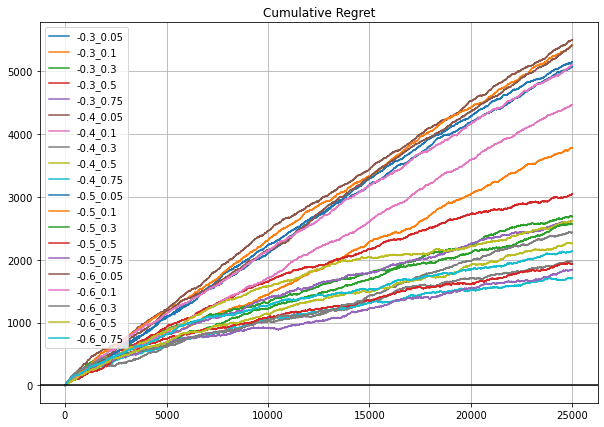

In [265]:
n_rounds = 25000
n_iterations = 20
temps = [0.05, 0.1, 0.3, 0.5, 0.75]
decays = [-0.3, -0.4, -0.5, -0.6]
dist = 'Dirichlet'
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 10, temp = temp, prob = decay_prob(decay))
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:52<00:00,  5.74s/it]


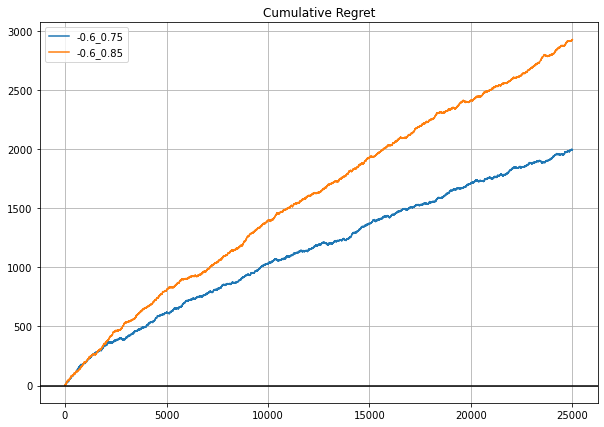

In [330]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.6, 0.75), (-0.6, 0.85)]
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 10, temp = temp, prob = decay_prob(decay))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:36<00:00,  5.22s/it]


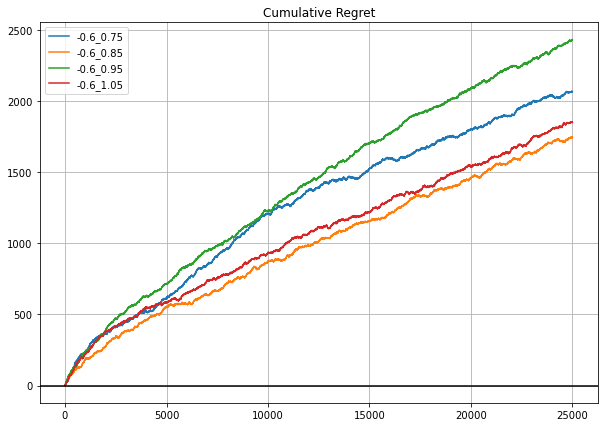

In [322]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.6, 0.75),(-0.6, 0.85), (-0.6, 0.95), (-0.6, 1.05)]
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 10, temp = temp, prob = decay_prob(decay))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:37<00:00,  4.85s/it]


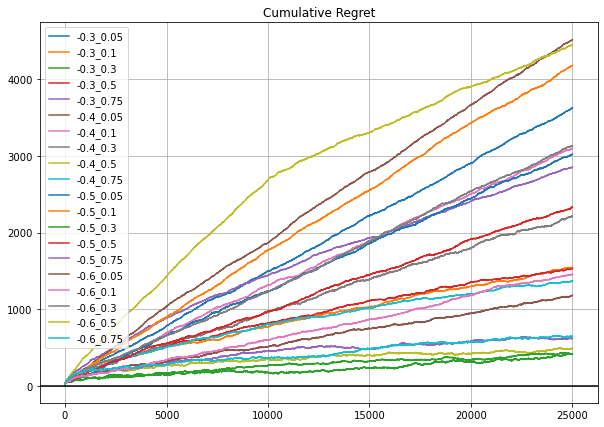

In [266]:
n_rounds = 25000
n_iterations = 20
temps = [0.05, 0.1, 0.3, 0.5, 0.75]
decays = [-0.3, -0.4, -0.5, -0.6]
dist = 'Dirichlet'
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 0.1, temp = temp, prob = decay_prob(decay))
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:36<00:00,  5.22s/it]


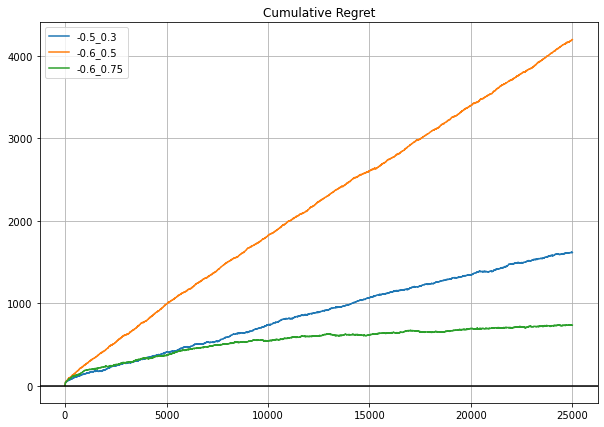

In [313]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.5, 0.3), (-0.6, 0.5), (-0.6, 0.75)]
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 0.1, temp = temp, prob = decay_prob(decay))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:44<00:00,  7.49s/it]


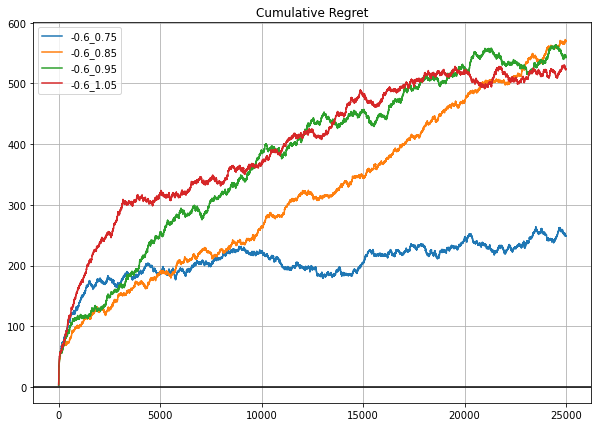

In [323]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.6, 0.75),(-0.6, 0.85), (-0.6, 0.95), (-0.6, 1.05)]
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = 0.1, temp = temp, prob = decay_prob(decay))
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:36<00:00,  4.83s/it]


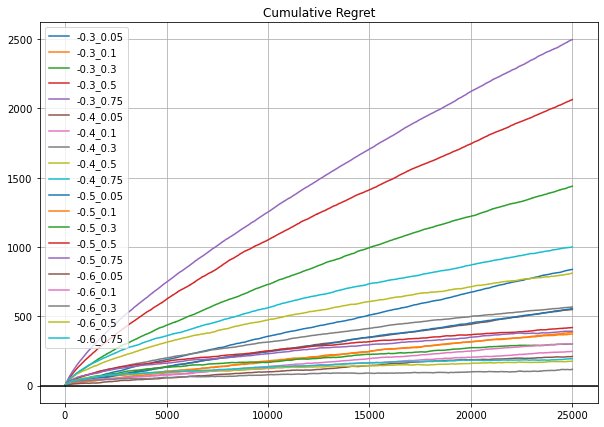

In [267]:
n_rounds = 25000
n_iterations = 20
temps = [0.05, 0.1, 0.3, 0.5, 0.75]
decays = [-0.3, -0.4, -0.5, -0.6]
dist = 'Bernoulli'
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, temp = temp, prob = decay_prob(decay), dist = dist)
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:23<00:00,  4.78s/it]


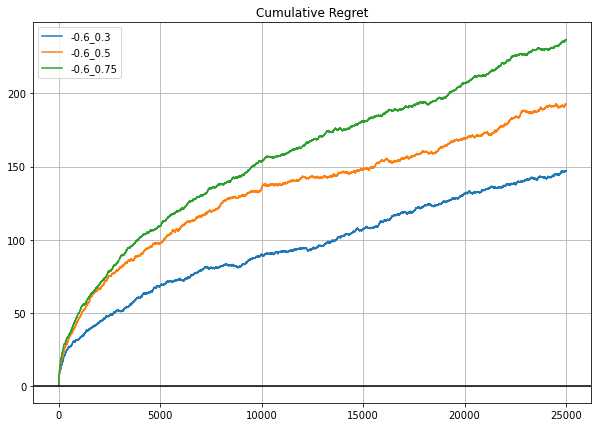

In [305]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.6, 0.3), (-0.6, 0.5), (-0.6, 0.75)]
dist = 'Bernoulli'
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, temp = temp, prob = decay_prob(decay), dist = dist)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:14<00:00,  6.48s/it]


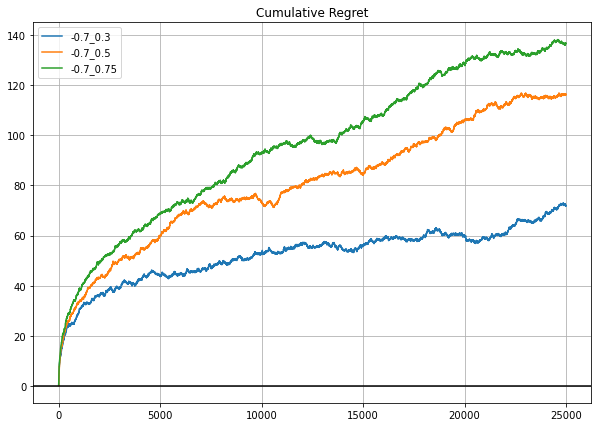

In [329]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.7, 0.3), (-0.7, 0.5), (-0.7, 0.75)]
dist = 'Bernoulli'
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, temp = temp, prob = decay_prob(decay), dist = dist)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:06<00:00,  6.21s/it]


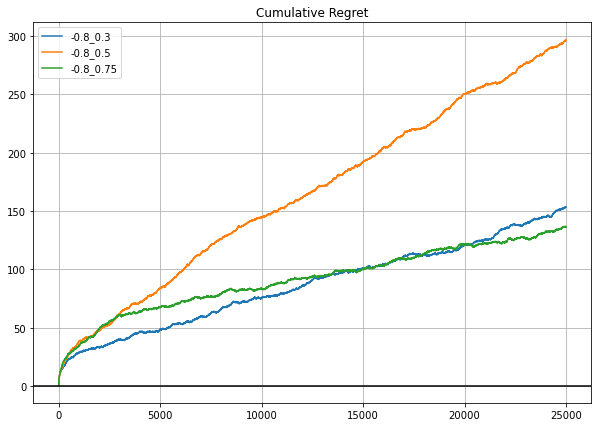

In [337]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.8, 0.3), (-0.8, 0.5), (-0.8, 0.75)]
dist = 'Bernoulli'
labels = []
x = []
y = []

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, temp = temp, prob = decay_prob(decay), dist = dist)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:48<00:00,  2.42s/it]


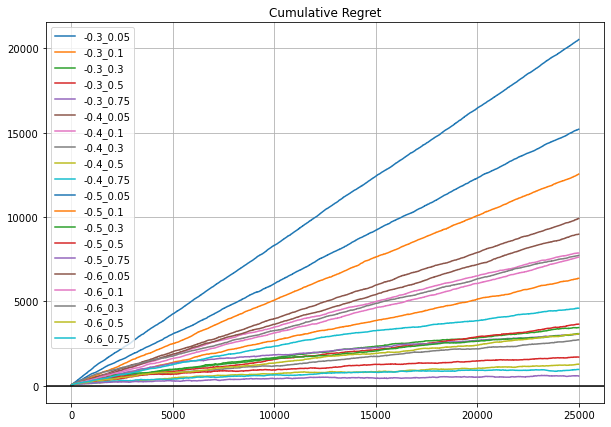

In [268]:
n_rounds = 25000
n_iterations = 20
temps = [0.05, 0.1, 0.3, 0.5, 0.75]
decays = [-0.3, -0.4, -0.5, -0.6]
dist = 'Poisson'
lambdas = np.arange(1,11,1)
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, temp = temp, prob = decay_prob(decay), dist = dist, lambdas = lambdas)
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:55<00:00,  1.86s/it]


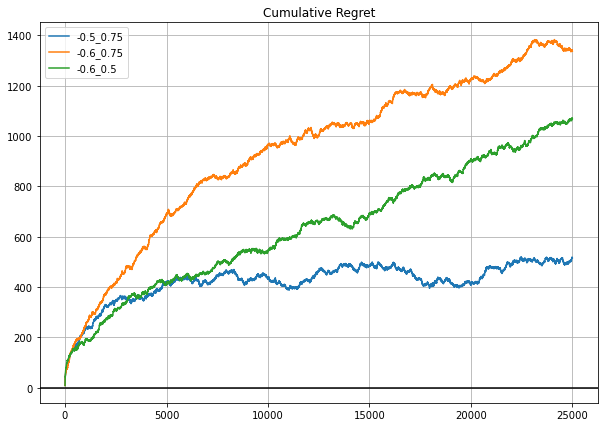

In [331]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.5, 0.75), (-0.6, 0.75), (-0.6, 0.5)]
labels = []
x = []
y = []
dist = 'Poisson'
lambdas = np.arange(1,11,1)

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, temp = temp, prob = decay_prob(decay), dist = dist, lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:37<00:00,  1.86s/it]


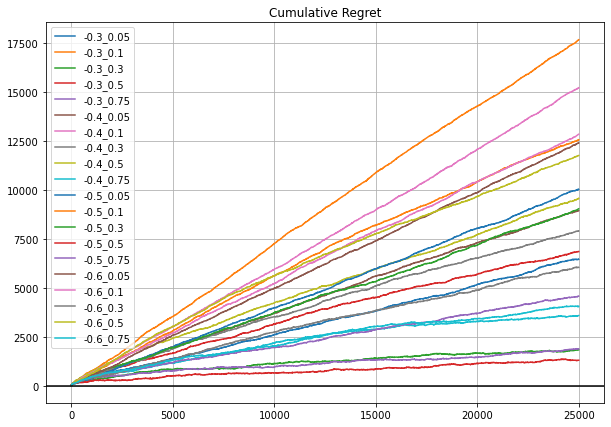

In [269]:
n_rounds = 25000
n_iterations = 20
temps = [0.05, 0.1, 0.3, 0.5, 0.75]
decays = [-0.3, -0.4, -0.5, -0.6]
dist = 'Poisson'
lambdas = np.arange(10,21,1)
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, temp = temp, prob = decay_prob(decay), dist = dist, lambdas = lambdas)
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:04<00:00,  2.16s/it]


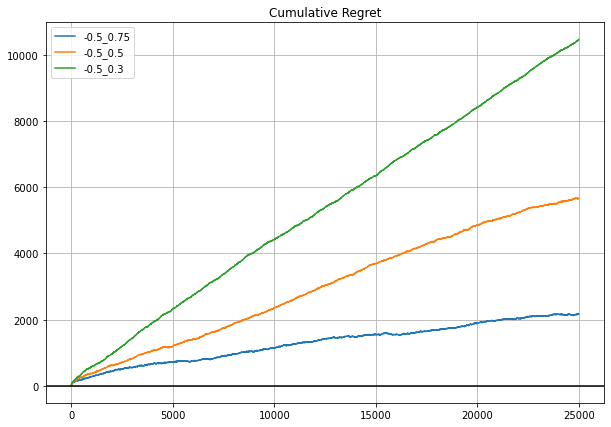

In [335]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.5, 0.75), (-0.5, 0.5), (-0.5, 0.3)]
labels = []
x = []
y = []
dist = 'Poisson'
lambdas = np.arange(10,21,1)

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, temp = temp, prob = decay_prob(decay), dist = dist, lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:30<00:00,  1.54s/it]


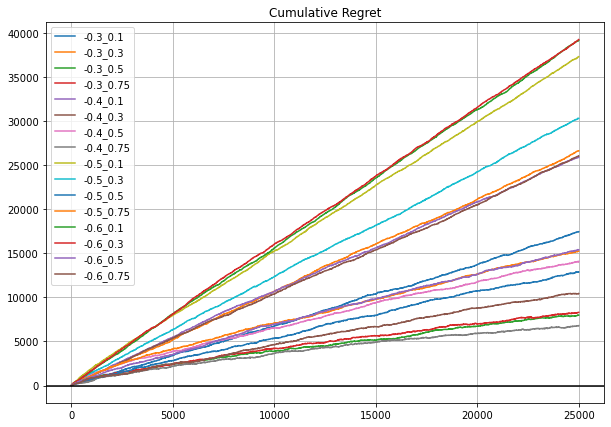

In [273]:
n_rounds = 25000
n_iterations = 20
temps = [0.1, 0.3, 0.5, 0.75]
decays = [-0.3, -0.4, -0.5, -0.6]
dist = 'Exponential'
lambdas = np.arange(1,11,1)
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, temp = temp, prob = decay_prob(decay), dist = dist, lambdas = lambdas)
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:11<00:00,  2.37s/it]


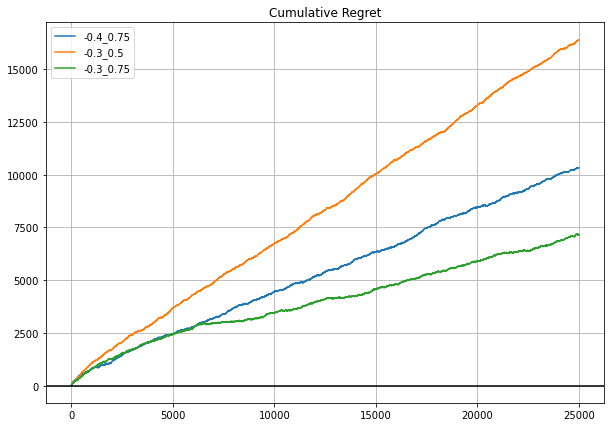

In [315]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.4, 0.75), (-0.3, 0.5), (-0.3, 0.75)]
labels = []
x = []
y = []
dist = 'Exponential'
lambdas = np.arange(1,11,1)

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, temp = temp, prob = decay_prob(decay), dist = dist, lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:31<00:00,  3.03s/it]


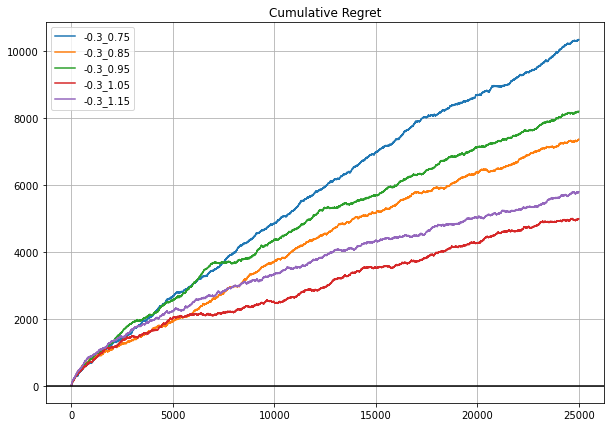

In [321]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.3, 0.75), (-0.3, 0.85), (-0.3, 0.95), (-0.3, 1.05), (-0.3, 1.15)]
labels = []
x = []
y = []
dist = 'Exponential'
lambdas = np.arange(1,11,1)

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, temp = temp, prob = decay_prob(decay), dist = dist, lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:38<00:00,  1.90s/it]


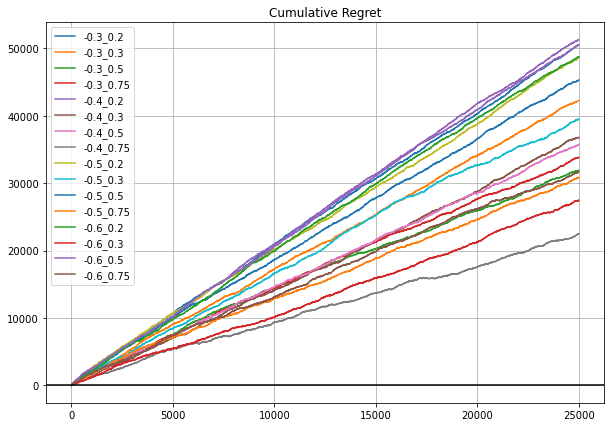

In [277]:
n_rounds = 25000
n_iterations = 20
temps = [0.2, 0.3, 0.5, 0.75]
decays = [-0.3, -0.4, -0.5, -0.6]
dist = 'Exponential'
lambdas = np.arange(10,21,1)
labels = []
x = []
y = []

for decay in decays:
    for temp in temps:
        all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, temp = temp, prob = decay_prob(decay), dist = dist, lambdas = lambdas)
        y.append(all_regrets.mean(axis = 0))
        x.append(np.arange(1, n_rounds + 1))
        label = str(decay) + '_' + str(temp) 
        labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:48<00:00,  1.62s/it]


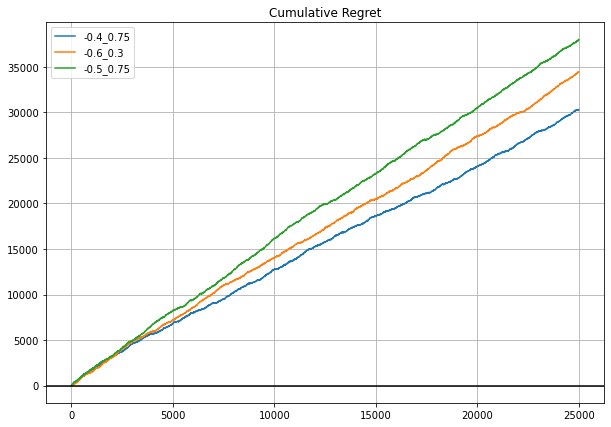

In [309]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.4, 0.75), (-0.6, 0.3), (-0.5, 0.75)]
labels = []
x = []
y = []
dist = 'Exponential'
lambdas = np.arange(10,21,1)

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, temp = temp, prob = decay_prob(decay), dist = dist, lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:08<00:00,  2.27s/it]


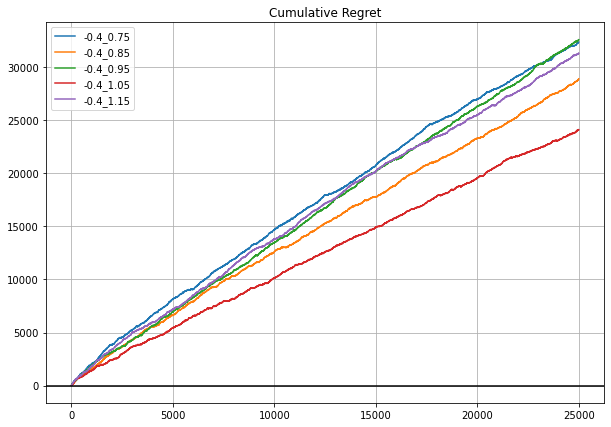

In [320]:
n_rounds = 25000
n_iterations = 30
pairs = [(-0.4, 0.75), (-0.4, 0.85), (-0.4, 0.95), (-0.4, 1.05), (-0.4, 1.15)]
labels = []
x = []
y = []
dist = 'Exponential'
lambdas = np.arange(10,21,1)

for p in pairs:
    decay = p[0]
    temp = p[1]
    all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, temp = temp, prob = decay_prob(decay), dist = dist, lambdas = lambdas)
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    label = str(decay) + '_' + str(temp) 
    labels.append(label)
    
cum_regret_plot(x, y, labels, big = True)

# UCB-1

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:39<00:00,  8.00s/it]


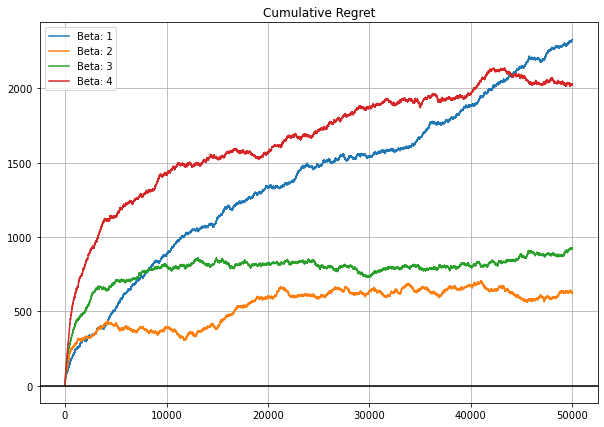

In [21]:
n_rounds = 50000
n_iterations = 20
betas = [1,2,3,4]
labels = [f'Beta: {i}' for i in betas]
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_1_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], conc = 0.5)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:40<00:00,  8.05s/it]


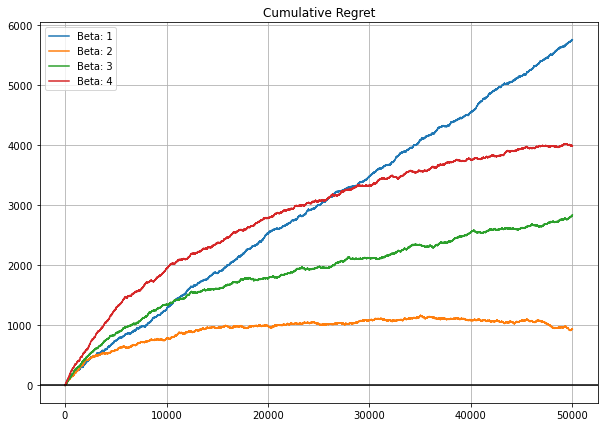

In [22]:
n_rounds = 50000
n_iterations = 20
betas = [1,2,3,4]
labels = [f'Beta: {i}' for i in betas]
x = []
y = []
for beta in betas:
    all_regrets = ucb_1_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, beta = beta, conc = 10)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:37<00:00,  2.50s/it]


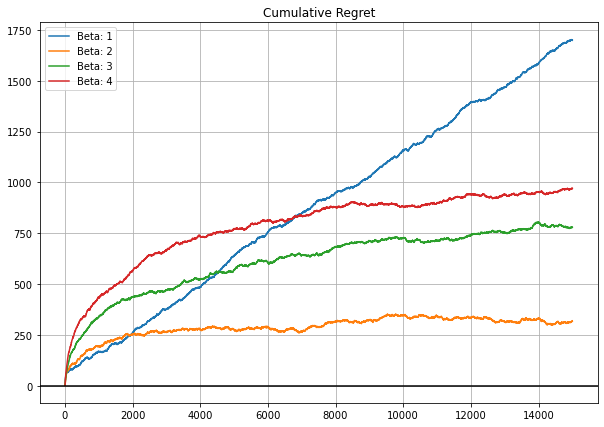

In [23]:
n_rounds = 15000
n_iterations = 15
betas = [1,2,3,4]
labels = [f'Beta: {i}' for i in betas]
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_1_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], conc = 0.1)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [03:01<00:00,  9.10s/it]


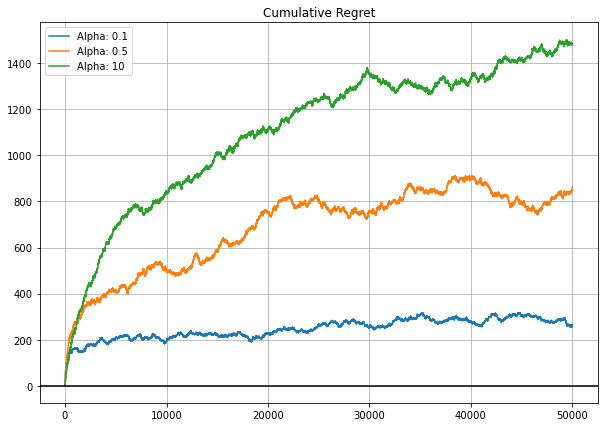

In [30]:
n_rounds = 50000
n_iterations = 20
concs = [0.1, 0.5, 10]
labels = [f'Alpha: {i}' for i in concs]
x = []
y = []

for conc in concs:
    all_regrets = ucb_1_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, beta = 2, conc = conc)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
    
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:15<00:00,  3.76s/it]


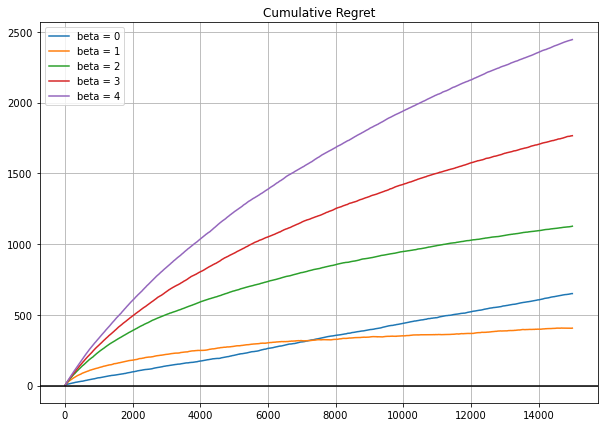

In [343]:
n_arms = 10
n_rounds = 15000
n_iterations = 20
dist = 'Bernoulli'
betas = [0,1,2,3,4]
y = []
labels = []
for beta in betas:
    all_regrets = ucb_1_experiment_generation(beta = beta, n_rounds = n_rounds, n_iterations = n_iterations, dist = dist)[0]
    y.append(all_regrets.mean(axis = 0))
    labels.append(f'beta = {beta}')
cum_regret_plot([np.arange(1, 1 + n_rounds) for i in range(len(betas))], y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:03<00:00,  3.18s/it]


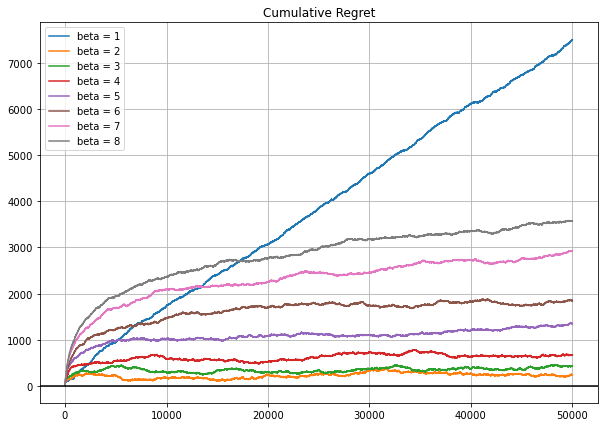

In [24]:
n_arms = 10
n_rounds = 50000
n_iterations = 20
dist = 'Poisson'
lambdas = np.arange(1,11,1)
betas = [1,2,3,4,5,6,7,8]
y = []
labels = []
for beta in betas:
    all_regrets = ucb_1_experiment_generation(beta = beta, n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    labels.append(f'beta = {beta}')
cum_regret_plot([np.arange(1, 1 + n_rounds) for i in range(len(betas))], y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:05<00:00,  3.25s/it]


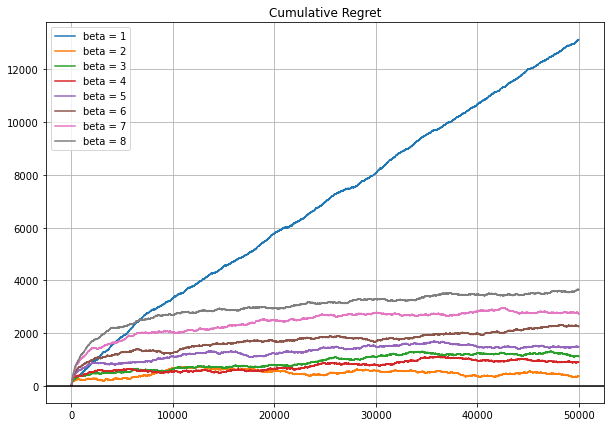

In [25]:
n_arms = 10
n_rounds = 50000
n_iterations = 20
dist = 'Poisson'
lambdas = np.arange(10,21,1)
betas = [1,2,3,4,5,6,7,8]
y = []
labels = []
for beta in betas:
    all_regrets = ucb_1_experiment_generation(beta = beta, n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    labels.append(f'beta = {beta}')
cum_regret_plot([np.arange(1, 1 + n_rounds) for i in range(len(betas))], y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:04<00:00,  3.23s/it]


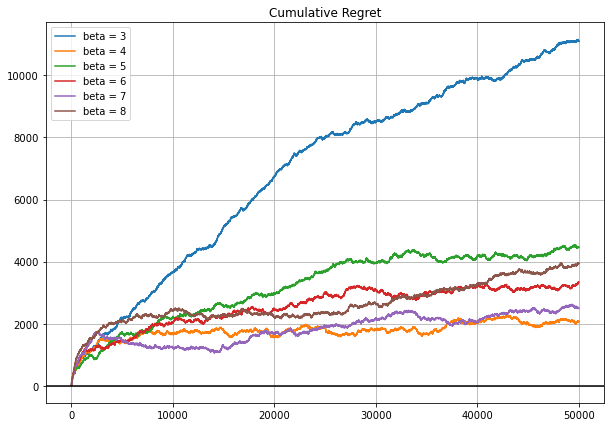

In [31]:
n_arms = 10
n_rounds = 50000
n_iterations = 20
dist = 'Exponential'
lambdas = np.arange(1,11,1)
betas = [3,4,5,6,7,8]
y = []
labels = []
for beta in betas:
    all_regrets = ucb_1_experiment_generation(beta = beta, n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    labels.append(f'beta = {beta}')
cum_regret_plot([np.arange(1, 1 + n_rounds) for i in range(len(betas))], y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:08<00:00,  3.41s/it]


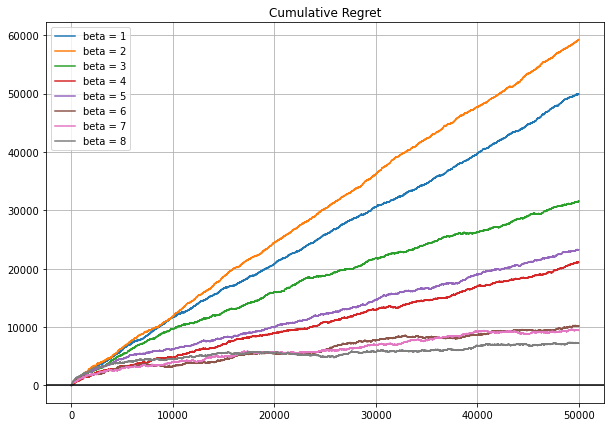

In [29]:
n_arms = 10
n_rounds = 50000
n_iterations = 20
dist = 'Exponential'
lambdas = np.arange(10,21,1)
betas = [1,2,3,4,5,6,7,8]
y = []
labels = []
for beta in betas:
    all_regrets = ucb_1_experiment_generation(beta = beta, n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    labels.append(f'beta = {beta}')
cum_regret_plot([np.arange(1, 1 + n_rounds) for i in range(len(betas))], y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:09<00:00,  3.46s/it]


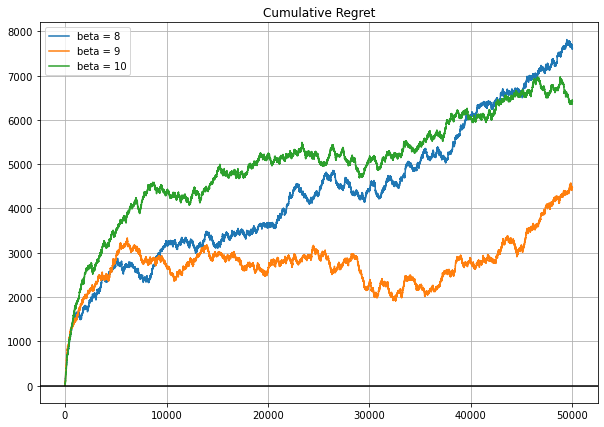

In [32]:
n_arms = 10
n_rounds = 50000
n_iterations = 20
dist = 'Exponential'
lambdas = np.arange(10,21,1)
betas = [8,9,10]
y = []
labels = []
for beta in betas:
    all_regrets = ucb_1_experiment_generation(beta = beta, n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    labels.append(f'beta = {beta}')
cum_regret_plot([np.arange(1, 1 + n_rounds) for i in range(len(betas))], y, labels, big = True)

# UCB-V

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [03:04<00:00,  9.25s/it]


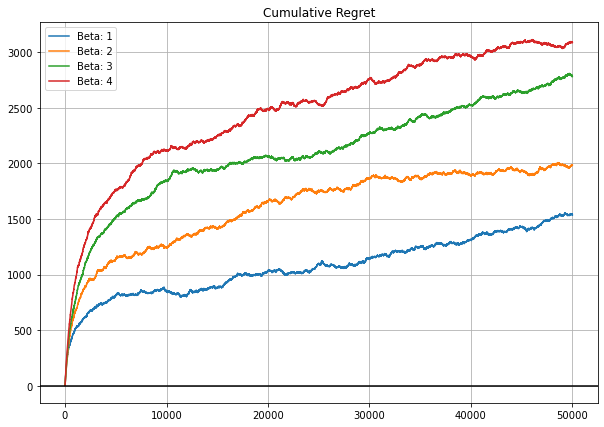

In [52]:
n_rounds = 50000
n_iterations = 20
betas = np.arange(1,5,1)
labels = [f'Beta: {i}' for i in betas]
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_v_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], conc = 0.5)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:35<00:00,  7.77s/it]


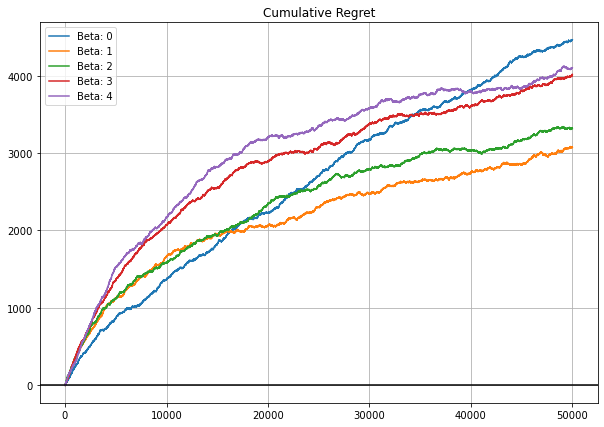

In [43]:
n_rounds = 50000
n_iterations = 20
betas = np.arange(0,5,1)
labels = [f'Beta: {i}' for i in betas]
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_v_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], conc = 10)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.01s/it]


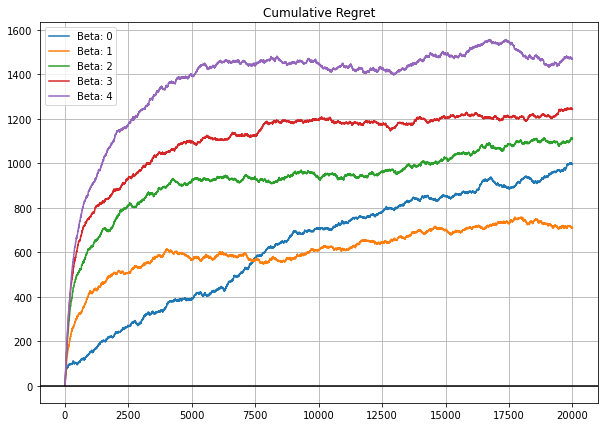

In [40]:
n_rounds = 20000
n_iterations = 10
betas = np.arange(0,5,1)
labels = [f'Beta: {i}' for i in betas]
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_v_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], conc = 0.1)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:31<00:00,  1.59s/it]


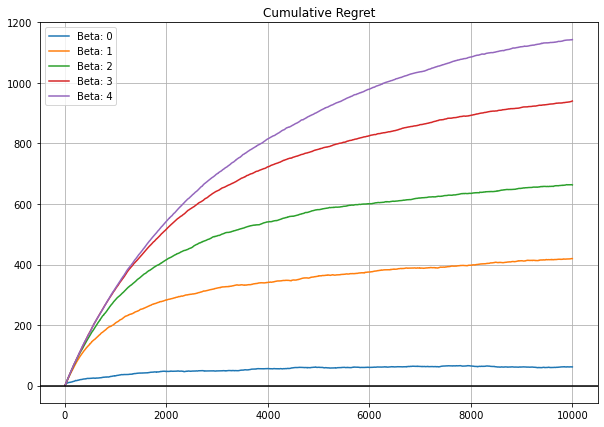

In [41]:
n_rounds = 10000
n_iterations = 20
dist = 'Bernoulli'
betas = [0,1,2,3,4]
labels = [f'Beta: {i}' for i in betas]
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_v_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], dist = dist)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:18<00:00,  1.80s/it]


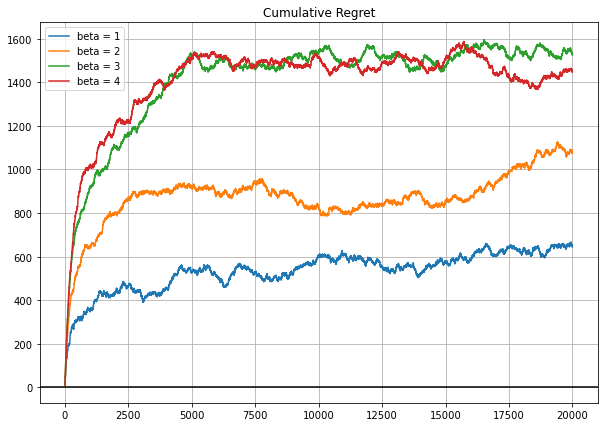

In [51]:
n_arms = 10
n_rounds = 20000
n_iterations = 10
dist = 'Poisson'
lambdas = np.arange(1,11,1)
betas = [1,2,3,4]
y = []
labels = []
for beta in betas:
    all_regrets = ucb_v_experiment_generation(beta = beta, n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    labels.append(f'beta = {beta}')
cum_regret_plot([np.arange(1, 1 + n_rounds) for i in range(len(betas))], y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:45<00:00,  5.29s/it]


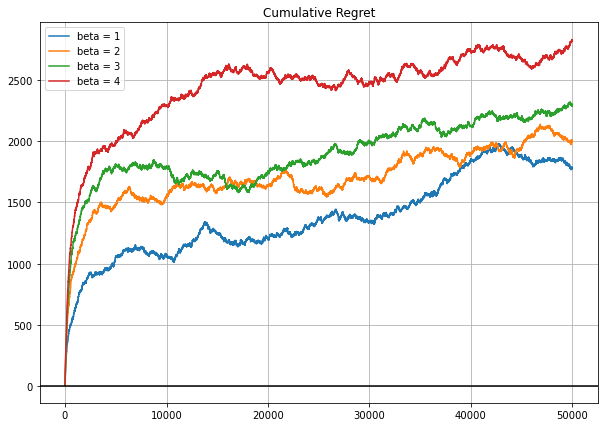

In [50]:
n_arms = 10
n_rounds = 50000
n_iterations = 20
dist = 'Poisson'
lambdas = np.arange(10,21,1)
betas = [1,2,3,4]
y = []
labels = []
for beta in betas:
    all_regrets = ucb_v_experiment_generation(beta = beta, n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    labels.append(f'beta = {beta}')
cum_regret_plot([np.arange(1, 1 + n_rounds) for i in range(len(betas))], y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:11<00:00,  4.40s/it]


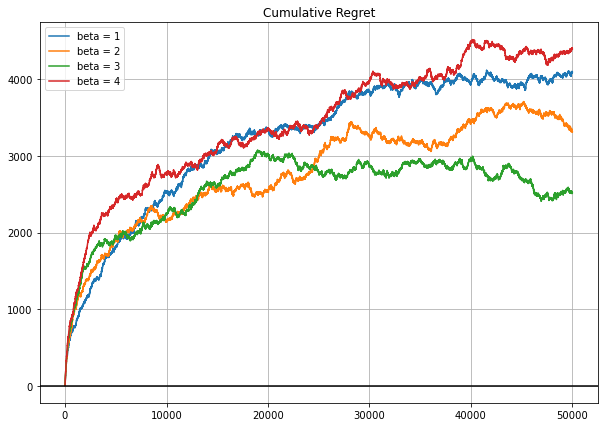

In [7]:
n_arms = 10
n_rounds = 50000
n_iterations = 30
dist = 'Exponential'
lambdas = np.arange(1,11,1)
betas = [1,2,3,4]
y = []
labels = []
for beta in betas:
    all_regrets = ucb_v_experiment_generation(beta = beta, n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    labels.append(f'beta = {beta}')
cum_regret_plot([np.arange(1, 1 + n_rounds) for i in range(len(betas))], y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:28<00:00,  4.96s/it]


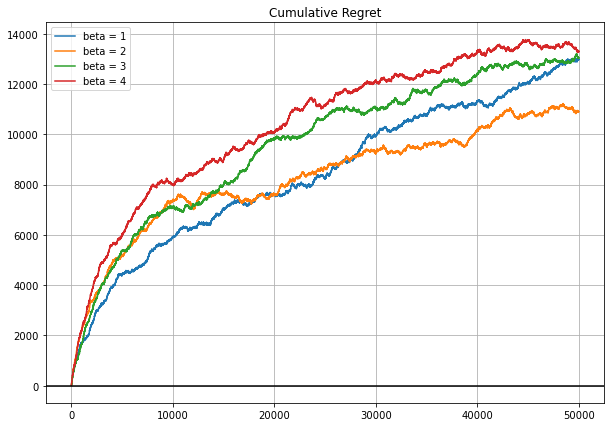

In [8]:
n_arms = 10
n_rounds = 50000
n_iterations = 30
dist = 'Exponential'
lambdas = np.arange(10,21,1)
betas = [1,2,3,4]
y = []
labels = []
for beta in betas:
    all_regrets = ucb_v_experiment_generation(beta = beta, n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    labels.append(f'beta = {beta}')
cum_regret_plot([np.arange(1, 1 + n_rounds) for i in range(len(betas))], y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:01<00:00,  6.06s/it]


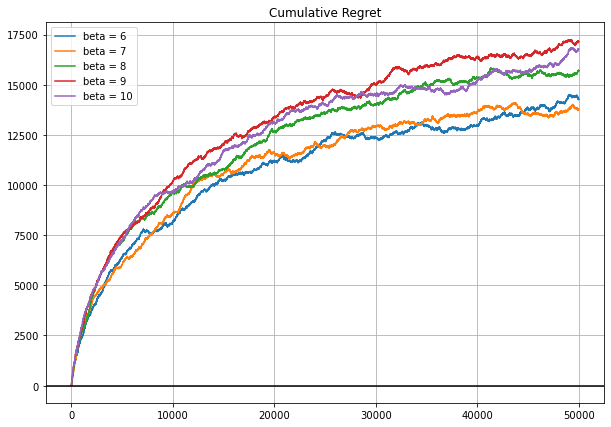

In [326]:
n_arms = 10
n_rounds = 50000
n_iterations = 30
dist = 'Exponential'
lambdas = np.arange(10,21,1)
betas = [6,7,8,9,10]
y = []
labels = []
for beta in betas:
    all_regrets = ucb_v_experiment_generation(beta = beta, n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    labels.append(f'beta = {beta}')
cum_regret_plot([np.arange(1, 1 + n_rounds) for i in range(len(betas))], y, labels, big = True)

# UCB-MOSS

In [8]:
class ucb_moss_player_new(player):
    def __init__(self, n_arms, n_rounds, beta):
        super().__init__(n_arms)
        self.ucbs = np.zeros(shape = n_arms)
        self.n_rounds = n_rounds
        self.n_arms = n_arms
        self.beta = beta
        
    def compute_ucbs(self, current_round):
        log_arg = self.n_rounds/self.n_arms*self.n_trials[self.n_trials > 0]
        log_arg[log_arg < 1] = 1
        self.ucbs[self.n_trials > 0] = self.beta*np.sqrt((1/self.n_trials[self.n_trials > 0])*np.log(log_arg))
        
    def choice(self):
        choice = np.argmax(self.means + self.ucbs)
        self.choices.append(choice)
        return choice

In [9]:
def ucb_moss_experiment_generation_new(n_rounds, n_iterations, beta, env = None, dist = 'Dirichlet', lambdas = None, conc = None):
    all_regrets = np.zeros(shape = (n_iterations, n_rounds))
    all_choices = np.zeros(shape = (n_iterations, n_rounds))
    
    for j in tqdm(range(n_iterations)):
        choices_rank = []
        if dist == 'Dirichlet':
            env = env_generation(n_arms = 10, n_variables = 10, conc = conc)
            ranked_means = sorted(env.all_means)
            player_1 = ucb_moss_player_new(n_arms = env.n_arms, n_rounds = n_rounds, beta = beta)
        elif dist == 'Bernoulli':
            env = env_generation(n_arms = 10, n_variables = 2, dist = dist)
            ranked_means = sorted(env.all_means)
            player_1 = ucb_moss_player_new(n_arms = env.n_arms, n_rounds = n_rounds, beta = beta)
        else:
            player_1 = ucb_moss_player_new(n_arms = len(lambdas), n_rounds = n_rounds, beta = beta)
            
        for i in range(1, n_rounds + 1):
            if i <= player_1.n_arms:
                choice = i - 1
                player_1.choices.append(choice)
            else:
                player_1.compute_ucbs(i)
                choice = player_1.choice()
                
            if dist == 'Dirichlet' or dist == 'Bernoulli':
                choices_rank.append(ranked_means.index(env.all_means[choice]))

            if dist == 'Dirichlet' or dist == 'Bernoulli': 
                reward = np.random.choice(env.rewards, p = env.probs_matrix[choice, :])
                best_reward = np.random.choice(env.rewards, p = env.probs_matrix[env.best_arm, :])
            elif dist == 'Poisson':
                best_reward = np.random.poisson(lam = lambdas[np.argmax(lambdas)])
                reward = np.random.poisson(lam = lambdas[choice])
            elif dist == 'Exponential':
                best_reward = np.random.exponential(scale = lambdas[np.argmax(lambdas)])
                reward = np.random.exponential(scale = lambdas[choice])
                
            player_1.update_n_trials(choice)
            player_1.update_mean(choice, reward)
            player_1.update_regret(reward, best_reward)
            
        all_regrets[j, :] = player_1.cumulative_regrets
        if dist == 'Dirichlet' or dist == 'Bernoulli':
            all_choices[j, :] = choices_rank
        else:
            all_choices[j, :] = player_1.choices
    return all_regrets, all_choices

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:19<00:00,  6.98s/it]


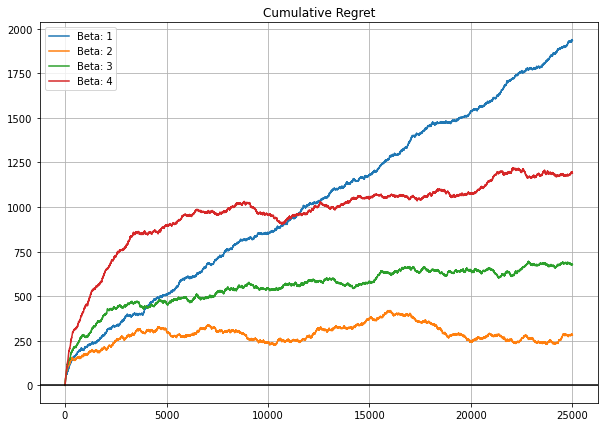

In [10]:
n_rounds = 25000
n_iterations = 20
betas = np.arange(1,5,1)
labels = [f'Beta: {i}' for i in betas]
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_moss_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], conc = 0.5)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [03:04<00:00,  5.27s/it]


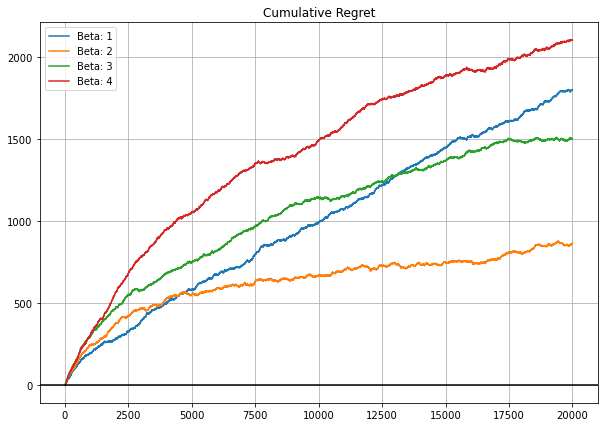

In [11]:
n_rounds = 20000
n_iterations = 35
betas = np.arange(1,5,1)
labels = [f'Beta: {i}' for i in betas]
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_moss_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], conc = 10)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [03:27<00:00,  5.94s/it]


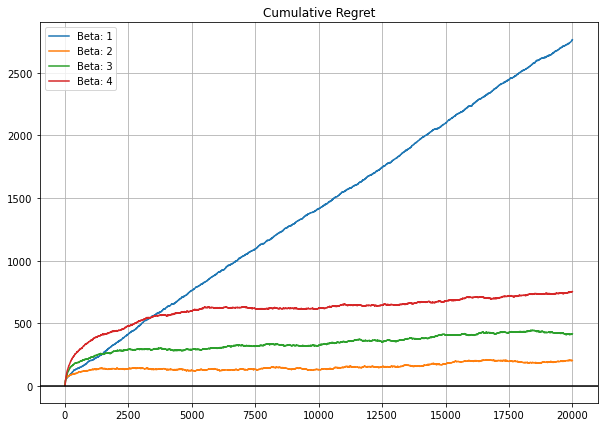

In [12]:
n_rounds = 20000
n_iterations = 35
betas = np.arange(1,5,1)
labels = [f'Beta: {i}' for i in betas]
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_moss_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], conc = 0.1)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:44<00:00,  8.23s/it]


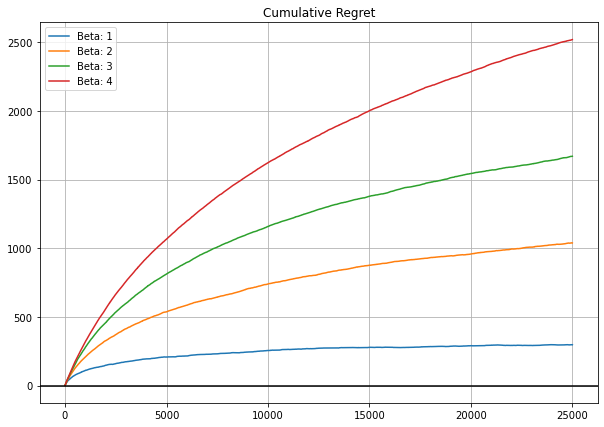

In [139]:
n_rounds = 25000
n_iterations = 20
betas = np.arange(1,5,1)
labels = [f'Beta: {i}' for i in betas]
dist = 'Bernoulli'
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_moss_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], dist = dist)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:29<00:00,  2.99s/it]


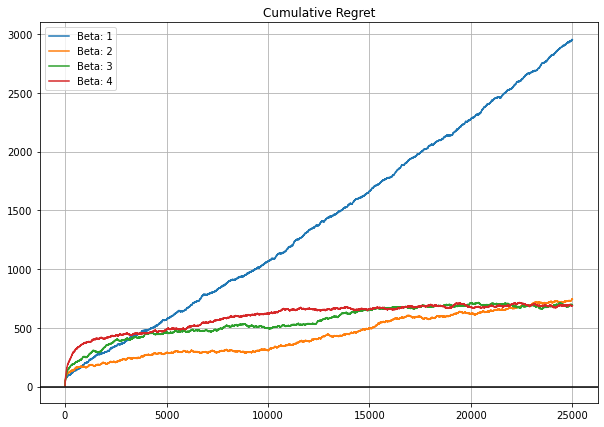

In [14]:
n_rounds = 25000
n_iterations = 50
betas = np.arange(1,5,1)
lambdas = np.arange(1,11,1)
labels = [f'Beta: {i}' for i in betas]
dist = 'Poisson'
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_moss_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:14<00:00,  3.89s/it]


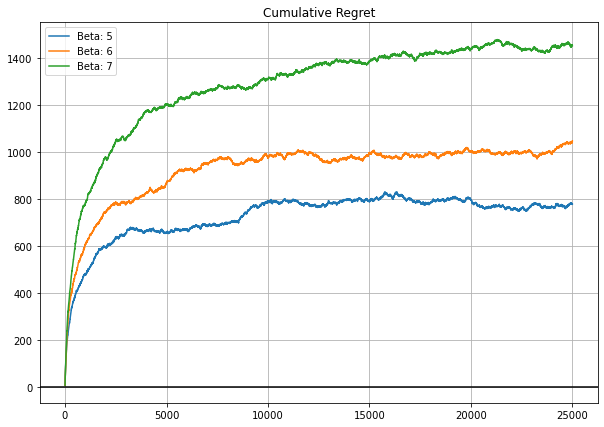

In [15]:
n_rounds = 25000
n_iterations = 50
betas = np.arange(5,8,1)
lambdas = np.arange(1,11,1)
labels = [f'Beta: {i}' for i in betas]
dist = 'Poisson'
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_moss_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:30<00:00,  3.02s/it]


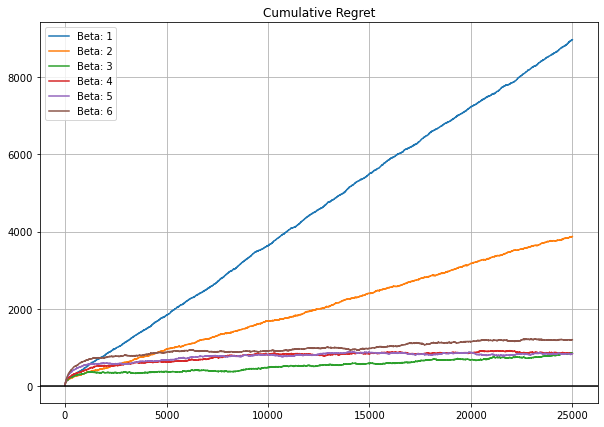

In [16]:
n_rounds = 25000
n_iterations = 50
betas = np.arange(1,7,1)
lambdas = np.arange(10,21,1)
labels = [f'Beta: {i}' for i in betas]
dist = 'Poisson'
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_moss_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [01:54<00:00,  3.26s/it]


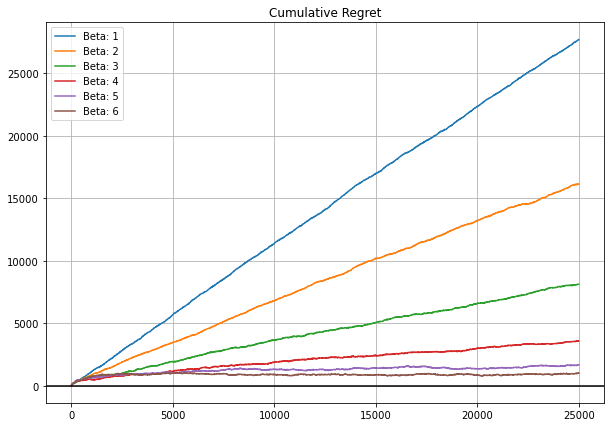

In [17]:
n_rounds = 25000
n_iterations = 35
betas = np.arange(1,7,1)
lambdas = np.arange(1,11,1)
labels = [f'Beta: {i}' for i in betas]
dist = 'Exponential'
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_moss_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [01:41<00:00,  2.91s/it]


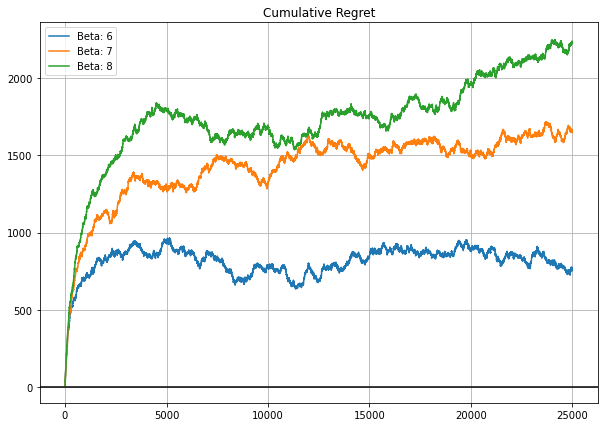

In [18]:
n_rounds = 25000
n_iterations = 35
betas = np.arange(6,9,1)
lambdas = np.arange(1,11,1)
labels = [f'Beta: {i}' for i in betas]
dist = 'Exponential'
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_moss_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [01:51<00:00,  3.19s/it]


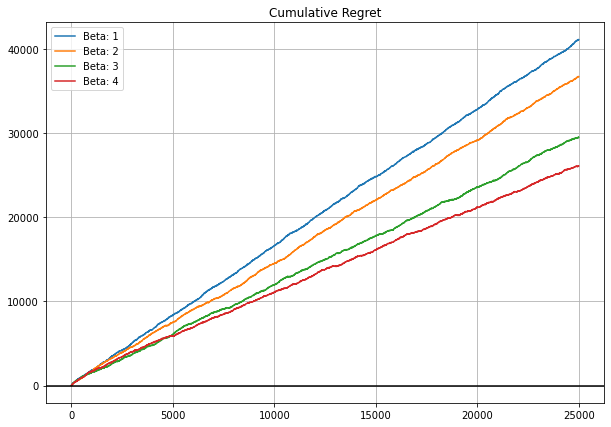

In [19]:
n_rounds = 25000
n_iterations = 35
betas = np.arange(1,5,1)
lambdas = np.arange(10,21,1)
labels = [f'Beta: {i}' for i in betas]
dist = 'Exponential'
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_moss_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [01:50<00:00,  3.16s/it]


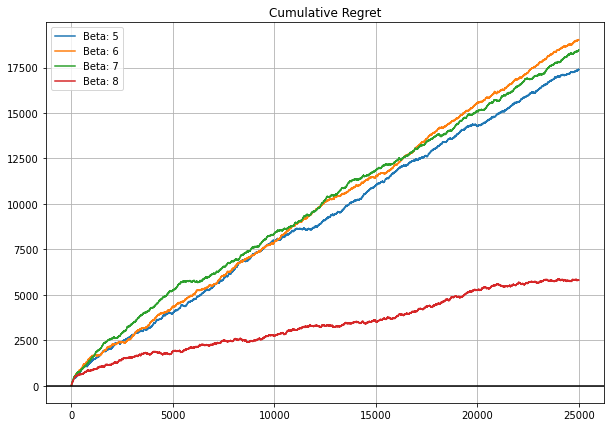

In [20]:
n_rounds = 25000
n_iterations = 35
betas = np.arange(5,9,1)
lambdas = np.arange(10,21,1)
labels = [f'Beta: {i}' for i in betas]
dist = 'Exponential'
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_moss_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [01:53<00:00,  3.23s/it]


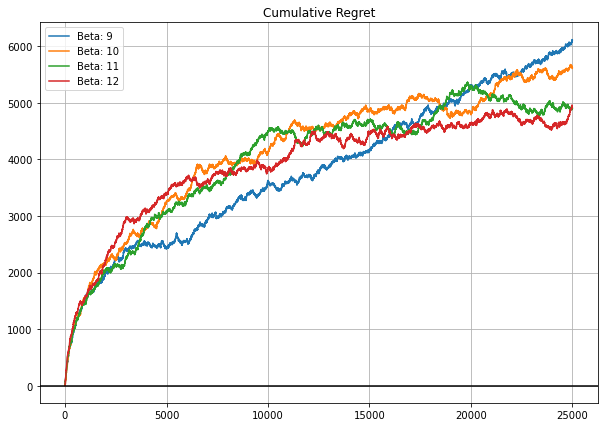

In [21]:
n_rounds = 25000
n_iterations = 35
betas = np.arange(9,13,1)
lambdas = np.arange(10,21,1)
labels = [f'Beta: {i}' for i in betas]
dist = 'Exponential'
x = []
y = []

for i in range(len(betas)):
    all_regrets = ucb_moss_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, beta = betas[i], dist = dist, lambdas = lambdas)[0]
    y.append(all_regrets.mean(axis = 0))
    x.append(np.arange(1, n_rounds + 1))
cum_regret_plot(x, y, labels, big = True)

# UCB-KL

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [10:20<00:00, 24.84s/it]


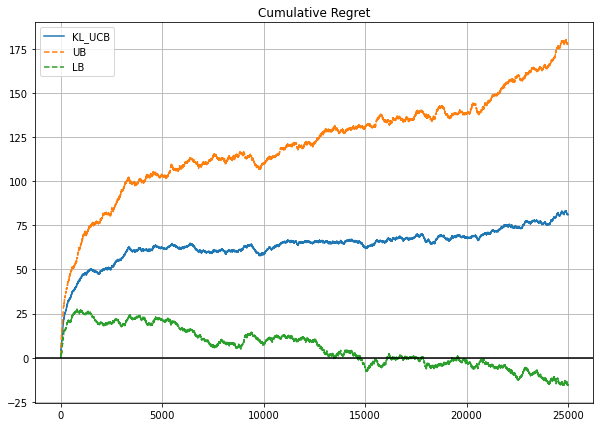

In [34]:
n_rounds = 25000
n_iterations = 25
all_regrets = ucb_kl_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = 'Bernoulli', l_rate = 0.2, max_iter = 10000)[0]
plt.figure(figsize = (10,7))
plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = 'KL_UCB')
plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0) + all_regrets.std(axis = 0), label = 'UB', linestyle = 'dashed')
plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0) - all_regrets.std(axis = 0), label = 'LB', linestyle = 'dashed')
plt.axhline(0, color = 'black')
plt.legend()
plt.grid()
plt.title('Cumulative Regret')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:43<00:00, 13.75s/it]


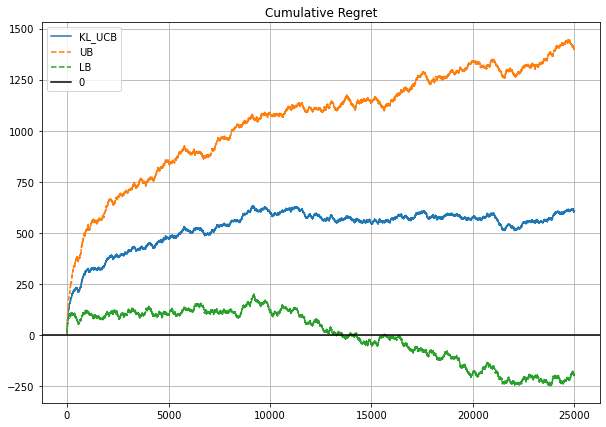

In [35]:
n_rounds = 25000
n_iterations = 25
dist = 'Poisson'
lambdas = np.arange(1,11,1)
l_rate = 0.05

all_regrets = ucb_kl_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist,  l_rate = l_rate, max_iter = 5000, lambdas = lambdas)[0]
plt.figure(figsize = (10,7))
plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = 'KL_UCB')
plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0) + all_regrets.std(axis = 0), label = 'UB', linestyle = 'dashed')
plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0) - all_regrets.std(axis = 0), label = 'LB', linestyle = 'dashed')
plt.axhline(0, color = 'black', label = '0')
plt.legend()
plt.grid()
plt.title('Cumulative Regret')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [07:01<00:00, 16.86s/it]


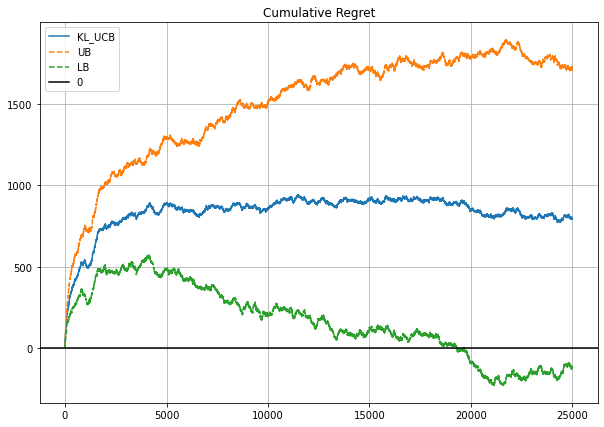

In [36]:
n_rounds = 25000
n_iterations = 25
dist = 'Poisson'
lambdas = np.arange(10,21,1)
l_rate = 0.05

all_regrets = ucb_kl_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist,  l_rate = l_rate, max_iter = 5000, lambdas = lambdas)[0]
plt.figure(figsize = (10,7))
plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = 'KL_UCB')
plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0) + all_regrets.std(axis = 0), label = 'UB', linestyle = 'dashed')
plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0) - all_regrets.std(axis = 0), label = 'LB', linestyle = 'dashed')
plt.axhline(0, color = 'black', label = '0')
plt.legend()
plt.grid()
plt.title('Cumulative Regret')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:14<00:00, 12.57s/it]


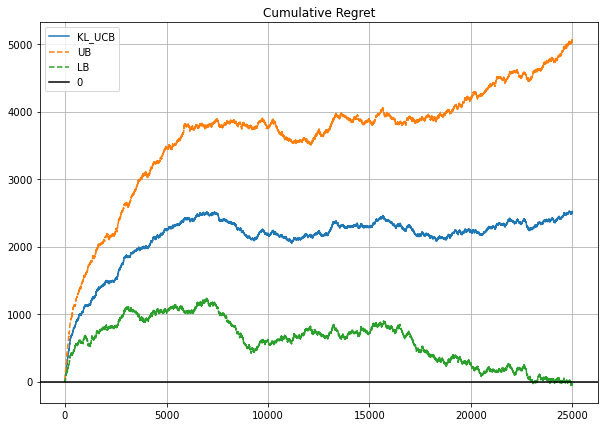

In [38]:
n_rounds = 25000
n_iterations = 25
dist = 'Exponential'
lambdas = np.arange(1,11,1)
l_rate = 0.05

all_regrets = ucb_kl_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist,  l_rate = l_rate, max_iter = 5000, lambdas = lambdas)[0]
plt.figure(figsize = (10,7))
plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = 'KL_UCB')
plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0) + all_regrets.std(axis = 0), label = 'UB', linestyle = 'dashed')
plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0) - all_regrets.std(axis = 0), label = 'LB', linestyle = 'dashed')
plt.axhline(0, color = 'black', label = '0')
plt.legend()
plt.grid()
plt.title('Cumulative Regret')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [07:20<00:00, 17.61s/it]


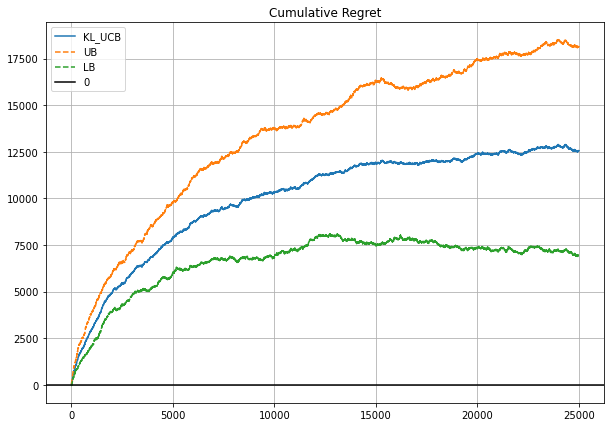

In [37]:
n_rounds = 25000
n_iterations = 25
dist = 'Exponential'
lambdas = np.arange(10,21,1)
l_rate = 0.05

all_regrets = ucb_kl_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist,  l_rate = l_rate, max_iter = 5000, lambdas = lambdas)[0]
plt.figure(figsize = (10,7))
plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0), label = 'KL_UCB')
plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0) + all_regrets.std(axis = 0), label = 'UB', linestyle = 'dashed')
plt.plot(np.arange(1, 1 + n_rounds), all_regrets.mean(axis = 0) - all_regrets.std(axis = 0), label = 'LB', linestyle = 'dashed')
plt.axhline(0, color = 'black', label = '0')
plt.legend()
plt.grid()
plt.title('Cumulative Regret')
plt.show()

# Bayes-UCB

In [141]:
class bayes_player_new(player):
    def __init__(self, n_arms, dist, shape = 1, scale = 1):
        super().__init__(n_arms)
        self.ucbs = np.zeros(shape = n_arms)
        self.dist = dist
        self.a = np.ones(shape = n_arms)
        self.b = np.ones(shape = n_arms)
        self.shape = np.array([shape for i in range(n_arms)])
        if dist == 'Exponential' or dist == 'Poisson':
            self.scale = [1/scale for i in range(n_arms)]
        else:
            self.scale = [scale for i in range(n_arms)]
        self.all_samples = np.zeros(shape  = (n_arms, 5000))
        self.alphas = [np.ones(shape = n_arms) for i in range(self.n_arms)]
                
    def choice(self):
        if dist != 'Exponential':
            choice = np.argmax(self.ucbs)
        else:
            choice = np.argmin(self.ucbs)
        self.choices.append(choice)
        return choice
    
    def compute_ucbs(self, current_round):
        if self.dist == 'Bernoulli':
            for i in range(self.n_arms):
                self.ucbs[i] = beta.ppf(a = self.a[i], b = self.b[i], q = 1 - 1/current_round)
        elif self.dist == 'Poisson':
            for i in range(self.n_arms):
                self.ucbs[i] = gamma.ppf(a = self.shape[i], scale = 1/self.scale[i], q =  1 - 1/current_round)
        elif self.dist == 'Exponential':
            for i in range(self.n_arms):
                self.ucbs[i] = gamma.ppf(a = self.shape[i], scale = 1/self.scale[i], q = 1/current_round)
        elif self.dist == 'Dirichlet':
            for i in range(self.n_arms):
                p_generator = np.random.default_rng()
                probs = p_generator.dirichlet(alpha = self.alphas[i])
                self.ucbs[i] = np.random.choice(np.arange(1,11), p = probs)
            
    
    def update_params(self, choice, reward):
        if self.dist == 'Bernoulli':
            if reward == 0:
                self.b[choice] += 1
            else:
                self.a[choice] += 1
            #self.all_samples[choice, :] = np.random.beta(a = self.a[choice], b = self.b[choice], size = 5000)

        elif self.dist == 'Poisson':
            self.shape[choice] += reward
            self.scale[choice] += 1
            #self.scale[choice] = float(self.scale[choice]/(self.scale[choice] + 1))
            #self.all_samples[choice, :] = np.random.negative_binomial(self.shape[choice], 1/(self.scale[choice] + 1), size = 1000)
            #self.all_samples[choice, :] = np.random.gamma(shape = self.shape[choice], scale = 1/self.scale[choice], size = 5000)
        elif self.dist == 'Exponential':
            self.shape[choice] += 1
            self.scale[choice] += reward
            #self.all_samples[choice, :] = lomax.rvs(c = self.shape[choice], scale = self.scale[choice], size = 1000)
            #self.all_samples[choice, :] = 1/np.random.gamma(shape = self.shape[choice], scale = 1/self.scale[choice], size = 5000)
            
        elif self.dist == 'Dirichlet':
            self.alphas[choice][reward-1] += 1

In [142]:
def bayes_experiment_generation_new(n_rounds, n_iterations, dist, lambdas = None, shape = 1, scale = 1, conc = None):
    all_regrets = np.zeros(shape = (n_iterations, n_rounds))
    all_choices = np.zeros(shape = (n_iterations, n_rounds))
    
    for j in tqdm(range(n_iterations)):
        choices_rank = []
        if dist == 'Bernoulli':
            env = env_generation(n_arms = 10, n_variables = 2, dist = dist)
            ranked_means = sorted(env.all_means)
            player_1 = bayes_player_new(n_arms = env.n_arms, dist = dist)
        elif dist == 'Poisson' or dist == 'Exponential':
            player_1 = bayes_player_new(n_arms = len(lambdas), dist = dist, shape = shape, scale = scale)
        elif dist == 'Dirichlet':
            env = env_generation(n_arms = 10, n_variables = 10, dist = dist, conc = conc)
            ranked_means = sorted(env.all_means)
            player_1 = bayes_player_new(n_arms = env.n_arms, dist = dist)
        
        for i in range(1, n_rounds + 1):
            if i <= player_1.n_arms:
                choice = i - 1
                player_1.choices.append(choice)
            else:
                player_1.compute_ucbs(i)
                choice = player_1.choice()
            
            if dist == 'Dirichlet' or dist == 'Bernoulli':
                choices_rank.append(ranked_means.index(env.all_means[choice]))
                
            if dist == 'Bernoulli' or dist == 'Dirichlet':
                reward = np.random.choice(env.rewards, p = env.probs_matrix[choice, :])
                best_reward = np.random.choice(env.rewards, p = env.probs_matrix[env.best_arm, :])
                
            if dist == 'Poisson':
                best_reward = np.random.poisson(lam = lambdas[np.argmax(lambdas)])
                reward = np.random.poisson(lam = lambdas[choice])
                
            elif dist == 'Exponential':
                best_reward = np.random.exponential(scale = lambdas[np.argmax(lambdas)])
                reward = np.random.exponential(scale = lambdas[choice])
                
            player_1.update_n_trials(choice)
            player_1.update_mean(choice, reward)
            player_1.update_params(choice, reward)
            player_1.update_regret(reward, best_reward)
        all_regrets[j, :] = player_1.cumulative_regrets
        if dist == 'Dirichlet' or dist == 'Bernoulli':
            all_choices[j, :] = choices_rank
        else:
            all_choices[j, :] = player_1.choices
        
    return all_regrets, all_choices, player_1.n_trials, player_1.shape, player_1.scale

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [04:30<00:00, 27.05s/it]


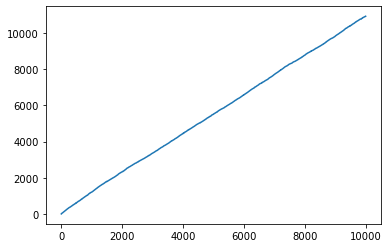

In [70]:
n_iterations = 10
n_rounds = 10000
dist = 'Dirichlet'
conc = 0.5

all_regrets = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, conc = conc)[0]

plt.plot(np.arange(n_rounds), all_regrets.mean(axis = 0))
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [25:53<00:00, 77.68s/it]


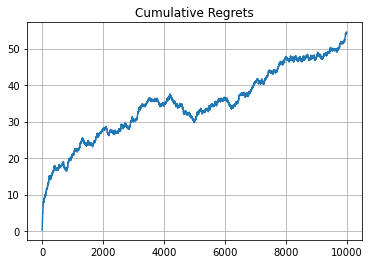

In [143]:
n_iterations = 20
n_rounds = 10000
dist = 'Bernoulli'

regrets = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas 
                                          ,#shape = 100, scale = 0.2/100
                                          )[0]
#dists, n_trials = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[2:4]
plt.plot(regrets.mean(axis = 0))
plt.grid()
plt.title('Cumulative Regrets')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [15:11<00:00, 45.60s/it]


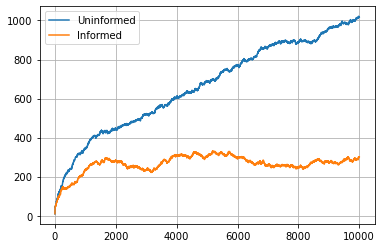

In [101]:
n_iterations = 20
n_rounds = 10000
dist = 'Poisson'
lambdas = np.arange(1,11,1)

all_regrets_1 = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
all_regrets_2 = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, scale = 1, shape = 5)[0]

plt.plot(np.arange(n_rounds), all_regrets_1.mean(axis = 0), label = 'Uninformed')
plt.plot(np.arange(n_rounds), all_regrets_2.mean(axis = 0), label = 'Informed')
plt.legend()
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [15:09<00:00, 45.46s/it]


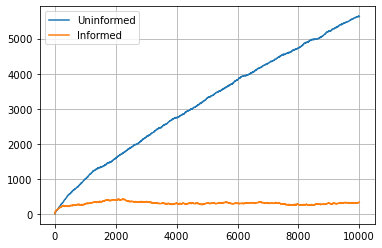

In [104]:
n_iterations = 20
n_rounds = 10000
dist = 'Poisson'
lambdas = np.arange(10,21,1)

all_regrets_1 = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
all_regrets_2 = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, scale = 1, shape = 15)[0]

plt.plot(np.arange(n_rounds), all_regrets_1.mean(axis = 0), label = 'Uninformed')
plt.plot(np.arange(n_rounds), all_regrets_2.mean(axis = 0), label = 'Informed')
plt.legend()
plt.grid()
plt.show()

0.06739462235095728
0.014963333333333335


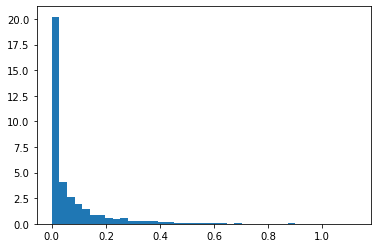

In [295]:
shape = 0.3
scale = 0.067/0.3
sample = np.random.gamma(shape = shape, scale = scale, size = 2000)
plt.hist(sample, bins = 40, density = True)
print(sample.mean())
print(shape*scale**2)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [13:52<00:00, 41.61s/it]


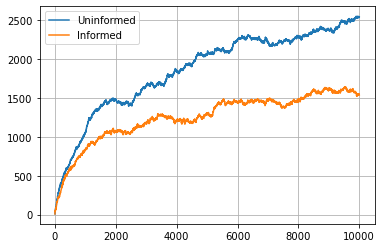

In [278]:
n_iterations = 20
n_rounds = 10000
dist = 'Exponential'
lambdas = np.arange(1,11,1)

all_regrets_1 = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
all_regrets_2 = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, shape = 5, scale = 0.2/5)[0]

plt.plot(np.arange(n_rounds), all_regrets_1.mean(axis = 0), label = 'Uninformed')
plt.plot(np.arange(n_rounds), all_regrets_2.mean(axis = 0), label = 'Informed')
plt.legend()
plt.grid()
plt.show()

In [248]:
n_iterations = 1
n_rounds = 4000
dist = 'Exponential'
lambdas = np.arange(1,11,1)

shapes, scales = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas 
                                          ,shape = 5, scale = 0.2/5
                                          )[-2:]
#dists, n_trials = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[2:4]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:17<00:00, 17.26s/it]


10.581779225752058


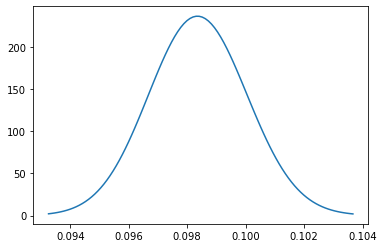

9.738597248334758


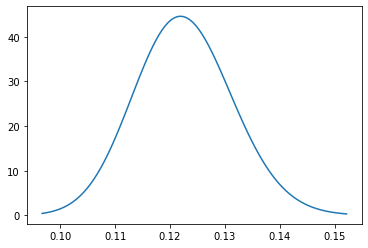

6.392555338160324


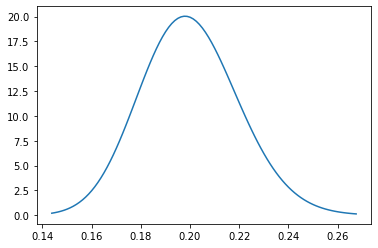

In [249]:
scale = 1/scales[9]
shape = shapes[9]
x = np.linspace(gamma.ppf(0.001, a = shape, scale = scale),
                gamma.ppf(0.999, a = shape, scale = scale), 100)
print(1/gamma.ppf(a = shape, scale = scale, q = 0.01))
plt.plot(x, gamma.pdf(x, a = shape, scale = scale))
plt.show()

scale = 1/scales[8]
shape = shapes[8]
x = np.linspace(gamma.ppf(0.001, a = shape, scale = scale),
                gamma.ppf(0.999, a = shape, scale = scale), 100)
print(1/gamma.ppf(a = shape, scale = scale, q = 0.01))
plt.plot(x, gamma.pdf(x, a = shape, scale = scale))
plt.show()

scale = 0.2/100
shape = 100
x = np.linspace(gamma.ppf(0.001, a = shape, scale = scale),
                gamma.ppf(0.999, a = shape, scale = scale), 100)
print(1/gamma.ppf(a = shape, scale = scale, q = 0.01))
plt.plot(x, gamma.pdf(x, a = shape, scale = scale))
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:20<00:00, 20.32s/it]


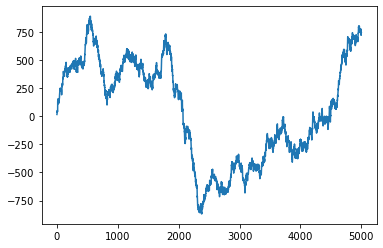

In [250]:
n_iterations = 1
n_rounds = 5000
dist = 'Exponential'
lambdas = np.arange(1,11,1)

regrets = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas 
                                          ,shape = 5, scale = 0.2/5
                                          )[0]
#dists, n_trials = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[2:4]
plt.plot(regrets.mean(axis = 0))
plt.show()

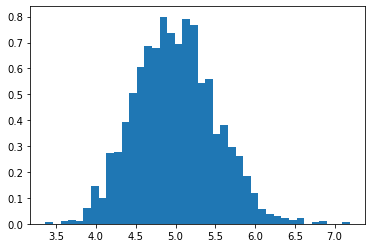

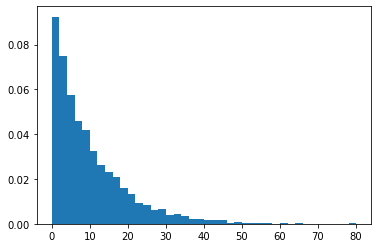

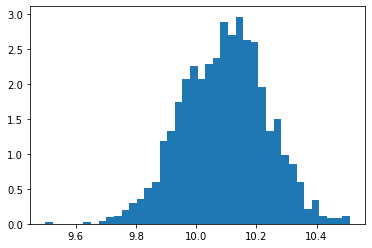

In [125]:
sample = np.random.gamma(shape = 100, scale = 5/100, size = 2000)
plt.hist(sample, bins = 40, density = True)
plt.show()

like = np.random.exponential(scale = 10, size = 5000)
plt.hist(like, bins = 40, density = True)
plt.show()

post = np.random.gamma(5001, scale = 1/(5/100 + like.sum()), size = 2000)
plt.hist(1/post, bins = 40, density = True)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [15:09<00:00, 45.47s/it]


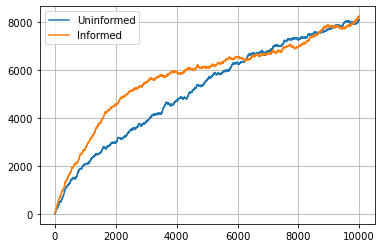

In [279]:
n_iterations = 20
n_rounds = 10000
dist = 'Exponential'
lambdas = np.arange(10,21,1)

all_regrets_1 = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
all_regrets_2 = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, scale = 5, shape = 0.067/5)[0]

plt.plot(np.arange(n_rounds), all_regrets_1.mean(axis = 0), label = 'Uninformed')
plt.plot(np.arange(n_rounds), all_regrets_2.mean(axis = 0), label = 'Informed')
plt.legend()
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [17:04<00:00, 51.23s/it]


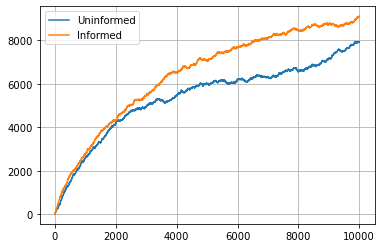

In [290]:
n_iterations = 20
n_rounds = 10000
dist = 'Exponential'
lambdas = np.arange(10,21,1)

all_regrets_1 = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
all_regrets_2 = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, scale = 2, shape = 0.067/2)[0]

plt.plot(np.arange(n_rounds), all_regrets_1.mean(axis = 0), label = 'Uninformed')
plt.plot(np.arange(n_rounds), all_regrets_2.mean(axis = 0), label = 'Informed')
plt.legend()
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [16:33<00:00, 49.66s/it]


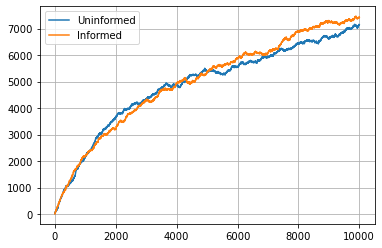

In [316]:
n_iterations = 20
n_rounds = 10000
dist = 'Exponential'
lambdas = np.arange(10,21,1)

all_regrets_1 = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
all_regrets_2 = bayes_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, shape = 0.3, scale = 0.067/0.3)[0]

plt.plot(np.arange(n_rounds), all_regrets_1.mean(axis = 0), label = 'Uninformed')
plt.plot(np.arange(n_rounds), all_regrets_2.mean(axis = 0), label = 'Informed')
plt.legend()
plt.grid()
plt.show()

# Thompson Sampling

In [90]:
def thompson_experiment_generation_new(n_rounds, n_iterations, dist, lambdas = None, lb = 0, ub = 1, conc = None):
    all_regrets = np.zeros(shape = (n_iterations, n_rounds))
    all_choices = np.zeros(shape = (n_iterations, n_rounds))
    
    for j in tqdm(range(n_iterations)):
        choices_rank = []
        if dist == 'Dirichlet':
            env = env_generation(n_arms = 10, n_variables = 10, conc = conc)
            ranked_means = sorted(env.all_means)
            player_1 = thom_player(n_arms = env.n_arms, dist = dist, lb = lb, ub = ub)
        elif dist == 'Bernoulli':
            env = env_generation(n_arms = 10, n_variables = 2, dist = dist)
            ranked_means = sorted(env.all_means)
            player_1 = thom_player(n_arms = env.n_arms, dist = dist, lb = lb, ub = ub)
        elif dist == 'Poisson' or dist == 'Exponential':
            player_1 = thom_player(n_arms = len(lambdas), dist = dist, lb = lb, ub = ub)
        
        for i in range(1, n_rounds + 1):
            if i <= player_1.n_arms:
                choice = i - 1
                player_1.choices.append(choice)
                
            else:
                choice = player_1.choice()
                
            if dist == 'Bernoulli' or dist == 'Dirichlet':
                choices_rank.append(ranked_means.index(env.all_means[choice]))
            
            if dist == 'Bernoulli' or dist == 'Dirichlet':
                reward = np.random.choice(env.rewards, p = env.probs_matrix[choice, :])
                best_reward = np.random.choice(env.rewards, p = env.probs_matrix[env.best_arm, :])
                
            if dist == 'Poisson':
                best_reward = np.random.poisson(lam = lambdas[np.argmax(lambdas)])
                reward = np.random.poisson(lam = lambdas[choice])
                
            elif dist == 'Exponential':
                best_reward = np.random.exponential(scale = lambdas[np.argmax(lambdas)])
                reward = np.random.exponential(scale = lambdas[choice])
                
            player_1.update_n_trials(choice)
            player_1.update_mean(choice, reward)
            if dist != 'Bernoulli':
                norm_reward = player_1.normalize(reward)
                player_1.update_params(choice, norm_reward)
            else:
                player_1.update_params(choice, reward)
            player_1.update_regret(reward, best_reward)
            
        all_regrets[j, :] = player_1.cumulative_regrets
        if dist == 'Dirichlet' or dist == 'Bernoulli':
            all_choices[j, :] = choices_rank
        else:
            all_choices[j, :] = player_1.choices
        
    return all_regrets, all_choices, player_1.a, player_1.b

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.39s/it]


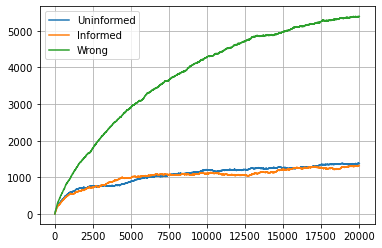

In [62]:
n_iterations = 10
n_rounds = 20000
dist = 'Dirichlet'

all_regrets_1 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = 0.5)[0]
all_regrets_2 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = 0.5, lb = 1, ub = 10)[0]
all_regrets_3 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = 0.5, lb = 1, ub = 30)[0]

plt.plot(np.arange(n_rounds), all_regrets_1.mean(axis = 0), label = 'Uninformed')
plt.plot(np.arange(n_rounds), all_regrets_2.mean(axis = 0), label = 'Informed')
plt.plot(np.arange(n_rounds), all_regrets_3.mean(axis = 0), label = 'Wrong')
plt.grid()
plt.legend()
plt.show()

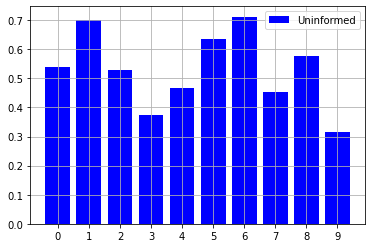

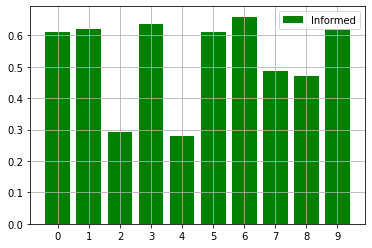

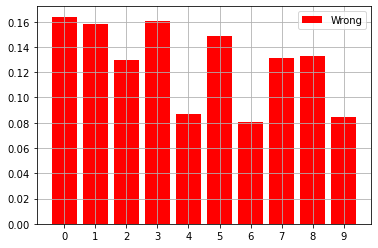

In [95]:
n_iterations = 10
n_rounds = 20000
dist = 'Dirichlet'

a_1, b_1 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = 0.5)[2:4]
a_2, b_2 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = 0.5, lb = 1, ub = 10)[2:4]
a_3, b_3 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = 0.5, lb = 1, ub = 30)[2:4]

plt.bar([str(i) for i in range(len(a_1))], (a_1 - 1)/(a_1 + b_1 - 2), label = 'Uninformed', color = 'o')
plt.grid()
plt.legend()
plt.show()
plt.bar([str(i) for i in range(len(a_1))], (a_2 - 1)/(a_2 + b_2 - 2), label = 'Informed', color = 'g')
plt.grid()
plt.legend()
plt.show()
plt.bar([str(i) for i in range(len(a_1))], (a_3 - 1)/(a_3 + b_3 - 2), label = 'Wrong', color = 'r')
plt.grid()
plt.legend()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:44<00:00,  2.24s/it]


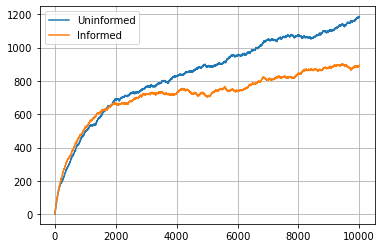

In [72]:
n_iterations = 20
n_rounds = 10000
dist = 'Dirichlet'

all_regrets_1 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = 0.5)[0]
all_regrets_2 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = 0.5, lb = 1, ub = 10)[0]

plt.plot(np.arange(n_rounds), all_regrets_1.mean(axis = 0), label = 'Uninformed')
plt.plot(np.arange(n_rounds), all_regrets_2.mean(axis = 0), label = 'Informed')
plt.grid()
plt.legend()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:28<00:00,  2.97s/it]


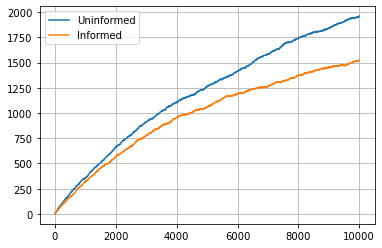

In [282]:
n_iterations = 50
n_rounds = 10000
dist = 'Dirichlet'

all_regrets_1 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = 10)[0]
all_regrets_2 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = 10, lb = 1, ub = 10)[0]

plt.plot(np.arange(n_rounds), all_regrets_1.mean(axis = 0), label = 'Uninformed')
plt.plot(np.arange(n_rounds), all_regrets_2.mean(axis = 0), label = 'Informed')
plt.grid()
plt.legend()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:13<00:00,  2.66s/it]


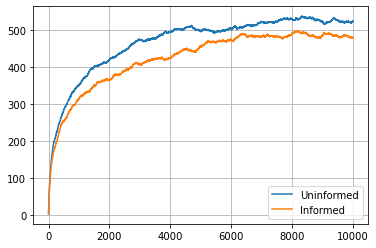

In [281]:
n_iterations = 50
n_rounds = 10000
dist = 'Dirichlet'

all_regrets_1 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = 0.1)[0]
all_regrets_2 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = 0.1, lb = 1, ub = 10)[0]

plt.plot(np.arange(n_rounds), all_regrets_1.mean(axis = 0), label = 'Uninformed')
plt.plot(np.arange(n_rounds), all_regrets_2.mean(axis = 0), label = 'Informed')
plt.grid()
plt.legend()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.02s/it]


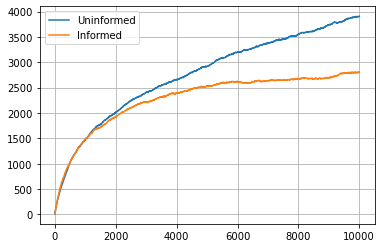

In [77]:
n_iterations = 20
n_rounds = 10000
dist = 'Poisson'
lambdas = np.arange(1,11,1)
ub = np.random.poisson(lam = np.max(lambdas), size = 1000).max()
lb = np.random.poisson(lam = np.min(lambdas), size = 1000).min()

all_regrets_1 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
all_regrets_2 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, lb = lb, ub = ub)[0]

plt.plot(np.arange(n_rounds), all_regrets_1.mean(axis = 0), label = 'Uninformed')
plt.plot(np.arange(n_rounds), all_regrets_2.mean(axis = 0), label = 'Informed')

plt.legend()
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.07s/it]


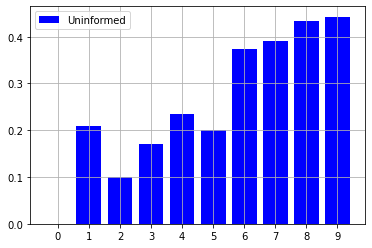

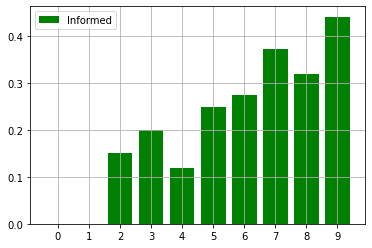

In [98]:
n_iterations = 20
n_rounds = 10000
dist = 'Poisson'
lambdas = np.arange(1,11,1)
ub = np.random.poisson(lam = np.max(lambdas), size = 1000).max()
lb = np.random.poisson(lam = np.min(lambdas), size = 1000).min()

a_1, b_1 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[2:4]
a_2, b_2 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, lb = lb, ub = ub)[2:4]

plt.bar([str(i) for i in range(len(a_1))], (a_1 - 1)/(a_1 + b_1 - 2), label = 'Uninformed', color = 'blue')
plt.grid()
plt.legend()
plt.show()
plt.bar([str(i) for i in range(len(a_1))], (a_2 - 1)/(a_2 + b_2 - 2), label = 'Informed', color = 'green')
plt.grid()
plt.legend()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:19<00:00,  1.00it/s]


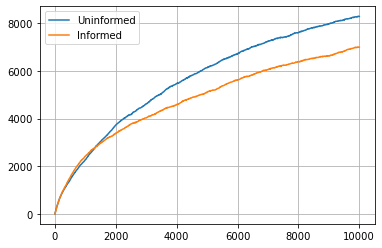

In [79]:
n_iterations = 20
n_rounds = 10000
dist = 'Poisson'
lambdas = np.arange(10,21,1)
ub = np.random.poisson(lam = np.max(lambdas), size = 1000).max()
lb = np.random.poisson(lam = np.min(lambdas), size = 1000).min()

all_regrets_1 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
all_regrets_2 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, lb = lb, ub = ub)[0]

plt.plot(np.arange(n_rounds), all_regrets_1.mean(axis = 0), label = 'Uninformed')
plt.plot(np.arange(n_rounds), all_regrets_2.mean(axis = 0), label = 'Informed')

plt.legend()
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:32<00:00,  1.63s/it]


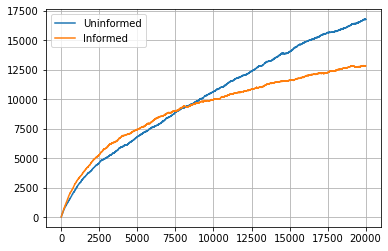

In [85]:
n_iterations = 20
n_rounds = 20000
dist = 'Exponential'
lambdas = np.arange(1,11,1)
ub = np.random.exponential(scale = np.max(lambdas), size = 1000).max()
lb = np.random.exponential(scale = np.min(lambdas), size = 1000).min()

all_regrets_1 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
all_regrets_2 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, lb = lb, ub = ub)[0]

plt.plot(np.arange(n_rounds), all_regrets_1.mean(axis = 0), label = 'Uninformed')
plt.plot(np.arange(n_rounds), all_regrets_2.mean(axis = 0), label = 'Informed')

plt.legend()
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:35<00:00,  1.78s/it]


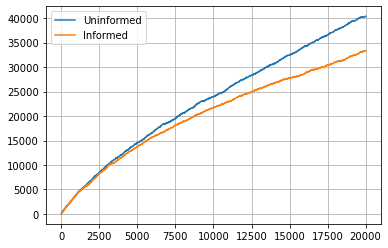

In [86]:
n_iterations = 20
n_rounds = 20000
dist = 'Exponential'
lambdas = np.arange(10,21,1)
ub = np.random.exponential(scale = np.max(lambdas), size = 1000).max()
lb = np.random.exponential(scale = np.min(lambdas), size = 1000).min()

all_regrets_1 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[0]
all_regrets_2 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, lb = lb, ub = ub)[0]

plt.plot(np.arange(n_rounds), all_regrets_1.mean(axis = 0), label = 'Uninformed')
plt.plot(np.arange(n_rounds), all_regrets_2.mean(axis = 0), label = 'Informed')

plt.legend()
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:40<00:00,  5.00s/it]


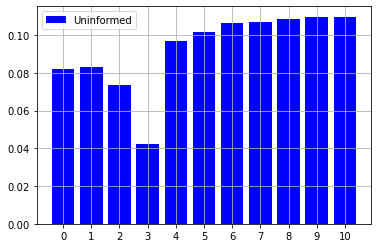

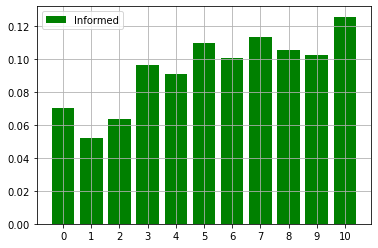

In [97]:
n_iterations = 20
n_rounds = 20000
dist = 'Exponential'
lambdas = np.arange(10,21,1)
ub = np.random.exponential(scale = np.max(lambdas), size = 1000).max()
lb = np.random.exponential(scale = np.min(lambdas), size = 1000).min()
a_1, b_1 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)[2:4]
a_2, b_2 = thompson_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas, lb = lb, ub = ub)[2:4]

plt.bar([str(i) for i in range(len(a_1))], (a_1 - 1)/(a_1 + b_1 - 2), label = 'Uninformed', color = 'blue')
plt.grid()
plt.legend()
plt.show()
plt.bar([str(i) for i in range(len(a_1))], (a_2 - 1)/(a_2 + b_2 - 2), label = 'Informed', color = 'green')
plt.grid()
plt.legend()
plt.show()

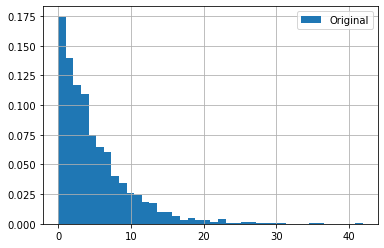

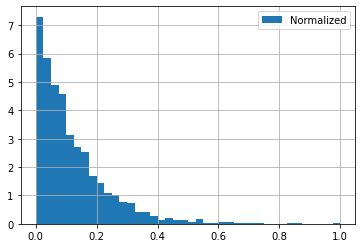

In [100]:
sample = np.random.exponential(scale = 5, size = 2000)
plt.hist(sample, bins = 40, density = True, label = 'Original')
plt.legend()
plt.grid()
plt.show()
sample = (sample - sample.min())/(sample.max() - sample.min())
plt.hist(sample, bins = 40, density = True, label = 'Normalized')
plt.legend()
plt.grid()
plt.show()